# CAP 5610 Machine Learning - Final Project

## Group 6 
  - Manuela Munoz
  - Maurício A Figueiredo
  - Pengju Sun

Due date: May 1st, 2022

# Business Problem

Telco, a telecommunications company, provides home phone and Internet services. The Telco customer churn data contains information about 7043 customers in California in Q3, which indicates that the company is experiencing a massive customer churn rate. In order to find out what factors caused this massive churn rate and how to deploy customer retention strategies to reduce customer churn, Telco hired us to dig insights from the data and asked us to:

- Develop a predictive model to classify customer churn risk,
- Identify cutomer pain points,
- Identify strategy/methods to lower churn and increase customer retention.


## Challenges

Challenges of building an effective churn model
Here are the main challenges that might make it difficult for you to build an effective churn model:

- Inaccurate or messy customer data,
- Weak attrition exploratory analysis,
- Lack of information and domain knowledge,
- Lack of a coherent selection of a suitable churn modeling approach,
- Choice of metrics to validate churn model performance,
- Line of business (LoB) of services or products,
- Churn event censorship,
- Concept drift based on changes in customers behaviour patterns driving churn,
- Imbalance data (class imbalance issue).

# Data Engineering

## Import Libraries

In [1]:
# Import necessary packages to the jupyter notebook
# Implement a Linear Regression model using both Normal Equation Method and SGD
# import libraries required to load, transform, analyze and plot data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline
import seaborn as sns
sns.set(context='paper', style='darkgrid', 
        rc={'figure.facecolor':'white'}, font_scale=1.2)
from pandas import MultiIndex, Int64Index

# import image module
from IPython.display import Image
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import make_scorer, precision_recall_curve, classification_report
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import roc_curve, auc, f1_score, roc_auc_score
from sklearn import tree
from sklearn.dummy import DummyClassifier
import statsmodels.api as sm
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import KFold

#Ensemble model
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection

#Warning
import warnings
warnings.filterwarnings('ignore')

#Sampling Techniques

from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.over_sampling import SMOTE

In [2]:
# remove scientific notation and restrictions on df rows/columns display
pd.options.display.float_format = '{:,.3f}'.format
pd.set_option('display.max_columns', None)
#pd.set_option('max_rows', 200)
pd.set_option('display.max_colwidth', 150)

## Data 

### Data Source
Data Source: IBM Cognos Telco Customer Churn Dataset

https://www.kaggle.com/yeanzc/telco-customer-churn-ibm-dataset

7043 observations with 33 variables

### Data Understanding

We classify 33 columns of data into six domains. The six categories in the domain include Customer, Demographics, Location, Services, Billing, and Customer Status.
- Customer: A unique customer ID identifies each of the 7,043 unique customers in our sample, with an average tenure of 0 to 72 months.
- Demographic: Customer demographic information includes gender, partner, senior citizen (indicates if the customer is 65 or older: Yes, No), and Dependents.
- Location: Geographic location includes country, state, zip code, latlong, latitude, and Longitude.
- Services: Ten services include phone services, multiple lines, internet service, online security, online back, device protection, tech support, streaming TV, and streaming movies.
- Billing: Includes contract type, billing configuration, and monthly charges.
- Customer status: Churn value (target variable), Churn Reasons, and two TelCo metrics for Churn Score and Customer Lifetime Value.

For more details on each feature explanation, please refer to https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113. The following table shows what features are included in each category of the dataset. 



### Data Info

In [3]:
# Read the data
filename = 'Telco_customer_churn.csv'
# Store the data in a data frame
data = pd.read_csv(filename)
# Visualize data
data.head()

CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long  Latitude  Longitude  Gender Senior Citizen Partner  \
0  33.964131, -118.272783    33.964   -118.273    Male             No      No   
1   34.059281, -118.30742    34.059   -118.307  Female             No      No   
2  34.048013, -118.293953    34.048   -118.294  Female             No      No   
3  34.062125, -118.315709    34.062   -118.316  Female             No     Yes   
4  34.039224, -118.266293    34.039   -118.266    Male             No      No   

  Dependents  Tenure Months Phone Service Multiple Lines Internet Service  \
0         No              2           Yes             No              DSL   
1        Yes              2           Yes             No      Fiber optic   
2        Yes              8           Yes            Yes      Fiber optic   
3        Yes             28           Yes            Yes      Fiber optic   
4        Yes             49           Yes            Yes      Fiber optic   

  Online Security Online Backup Device Protection Tech Support Streaming TV  \
0             Yes           Yes                No           No           No   
1              No            No                No           No           No   
2              No            No               Yes           No          Yes   
3              No            No               Yes          Yes          Yes   
4              No           Yes               Yes           No          Yes   

  Streaming Movies        Contract Paperless Billing  \
0               No  Month-to-month               Yes   
1               No  Month-to-month               Yes   
2              Yes  Month-to-month               Yes   
3              Yes  Month-to-month               Yes   
4              Yes  Month-to-month               Yes   

              Payment Method  Monthly Charges Total Charges Churn Label  \
0               Mailed check           53.850        108.15         Yes   
1           Electronic check           70.700        151.65         Yes   
2           Electronic check           99.650         820.5         Yes   
3           Electronic check          104.800       3046.05         Yes   
4  Bank transfer (automatic)          103.700        5036.3         Yes   

   Churn Value  Churn Score  CLTV                   Churn Reason  
0            1           86  3239   Competitor made better offer  
1            1           67  2701                          Moved  
2            1           86  5372                          Moved  
3            1           84  5003                          Moved  
4            1           89  5340  Competitor had better devices

### Data Cleaning

In [4]:
# Data columns
data.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [5]:
# Drop the columns that we don't need for the models
columns_drop = ['CustomerID','Count','Country','State','City','Zip Code',
                'Lat Long','Latitude','Longitude','Churn Reason','Churn Score'
                ,'CLTV','Churn Value']
# Visualize the data
data.drop(columns = columns_drop, inplace = True)
# convert column names to lower case without underscore
data.columns = data.columns.str.lower().str.replace(' ','_')
data.head()

gender senior_citizen partner dependents  tenure_months phone_service  \
0    Male             No      No         No              2           Yes   
1  Female             No      No        Yes              2           Yes   
2  Female             No      No        Yes              8           Yes   
3  Female             No     Yes        Yes             28           Yes   
4    Male             No      No        Yes             49           Yes   

  multiple_lines internet_service online_security online_backup  \
0             No              DSL             Yes           Yes   
1             No      Fiber optic              No            No   
2            Yes      Fiber optic              No            No   
3            Yes      Fiber optic              No            No   
4            Yes      Fiber optic              No           Yes   

  device_protection tech_support streaming_tv streaming_movies  \
0                No           No           No               No   
1                No           No           No               No   
2               Yes           No          Yes              Yes   
3               Yes          Yes          Yes              Yes   
4               Yes           No          Yes              Yes   

         contract paperless_billing             payment_method  \
0  Month-to-month               Yes               Mailed check   
1  Month-to-month               Yes           Electronic check   
2  Month-to-month               Yes           Electronic check   
3  Month-to-month               Yes           Electronic check   
4  Month-to-month               Yes  Bank transfer (automatic)   

   monthly_charges total_charges churn_label  
0           53.850        108.15         Yes  
1           70.700        151.65         Yes  
2           99.650         820.5         Yes  
3          104.800       3046.05         Yes  
4          103.700        5036.3         Yes

In [6]:
# Review data types and null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7043 non-null   object 
 1   senior_citizen     7043 non-null   object 
 2   partner            7043 non-null   object 
 3   dependents         7043 non-null   object 
 4   tenure_months      7043 non-null   int64  
 5   phone_service      7043 non-null   object 
 6   multiple_lines     7043 non-null   object 
 7   internet_service   7043 non-null   object 
 8   online_security    7043 non-null   object 
 9   online_backup      7043 non-null   object 
 10  device_protection  7043 non-null   object 
 11  tech_support       7043 non-null   object 
 12  streaming_tv       7043 non-null   object 
 13  streaming_movies   7043 non-null   object 
 14  contract           7043 non-null   object 
 15  paperless_billing  7043 non-null   object 
 16  payment_method     7043 

**Summary**
- There are 20 clolumns. 19 features and 1 target variable. No null values are found in all data columns
- Unexpected data types: total_charges (object), It should be numerical datatype. 

In [7]:
# Check the number of the empty str
data[data['total_charges'] == ' ']

gender senior_citizen partner dependents  tenure_months phone_service  \
2234  Female             No     Yes         No              0            No   
2438    Male             No      No         No              0           Yes   
2568  Female             No     Yes         No              0           Yes   
2667    Male             No     Yes        Yes              0           Yes   
2856  Female             No     Yes         No              0            No   
4331    Male             No     Yes        Yes              0           Yes   
4687    Male             No     Yes        Yes              0           Yes   
5104  Female             No     Yes        Yes              0           Yes   
5719    Male             No     Yes        Yes              0           Yes   
6772  Female             No     Yes        Yes              0           Yes   
6840    Male             No      No        Yes              0           Yes   

        multiple_lines internet_service      online_security  \
2234  No phone service              DSL                  Yes   
2438                No               No  No internet service   
2568                No              DSL                  Yes   
2667               Yes               No  No internet service   
2856  No phone service              DSL                  Yes   
4331                No               No  No internet service   
4687               Yes               No  No internet service   
5104                No               No  No internet service   
5719                No               No  No internet service   
6772               Yes              DSL                   No   
6840               Yes              DSL                  Yes   

            online_backup    device_protection         tech_support  \
2234                   No                  Yes                  Yes   
2438  No internet service  No internet service  No internet service   
2568                  Yes                  Yes                   No   
2667  No internet service  No internet service  No internet service   
2856                  Yes                  Yes                  Yes   
4331  No internet service  No internet service  No internet service   
4687  No internet service  No internet service  No internet service   
5104  No internet service  No internet service  No internet service   
5719  No internet service  No internet service  No internet service   
6772                  Yes                  Yes                  Yes   
6840                  Yes                   No                  Yes   

             streaming_tv     streaming_movies  contract paperless_billing  \
2234                  Yes                   No  Two year               Yes   
2438  No internet service  No internet service  Two year                No   
2568                  Yes                  Yes  Two year                No   
2667  No internet service  No internet service  Two year                No   
2856                  Yes                   No  Two year                No   
4331  No internet service  No internet service  Two year                No   
4687  No internet service  No internet service  Two year                No   
5104  No internet service  No internet service  Two year                No   
5719  No internet service  No internet service  One year               Yes   
6772                  Yes                   No  Two year                No   
6840                   No                   No  Two year               Yes   

                 payment_method  monthly_charges total_charges churn_label  
2234  Bank transfer (automatic)           52.550                        No  
2438               Mailed check           20.250                        No  
2568               Mailed check           80.850                        No  
2667               Mailed check           25.750                        No  
2856    Credit card (automatic)           56.050                        No  
4331               Mailed check     

In [8]:
# Convert string datatype to numercial datatype
data['total_charges'] = pd.to_numeric(data['total_charges'],errors='coerce') #If ‘coerce’, then invalid parsing will be set as NaN.

# Check the converted datatype
print(data['total_charges'].dtype)

# Check the number of missing values in column 'Total Charges'
print(data['total_charges'].isna().sum())

# From the above table, it shows that the tenture months are 0 for the rows where the total charges are 0. 
# We got a match here. Before comfirming to replace the missing values in total charge values with 0, we also need to check
# if there are any other 0 values in 'Tenure Months'
print(data[data['tenure_months'] == 0].index) # another method: print(df[df['tenure'].isin([0])].index)
print(data[data['total_charges'].isna()].index)

# From the result, we can see that the indexes of 0 values in column 'Tenure Months' matches the indexes of Null values in column 'Total Charges'
# So now we can replace those missing values in column 'Total Charges' with '0'
data.loc[:,'total_charges'] = data.loc[:,'total_charges'].replace(np.nan,0)
data['total_charges'].isnull().sum()

float64
11
Int64Index([2234, 2438, 2568, 2667, 2856, 4331, 4687, 5104, 5719, 6772, 6840], dtype='int64')
Int64Index([2234, 2438, 2568, 2667, 2856, 4331, 4687, 5104, 5719, 6772, 6840], dtype='int64')


0

In [9]:
# Store the indexs in a list
indexs = list(data[data['tenure_months'] == 0].index)

In [10]:
# Observed the rows with missing data
rows=data.iloc[indexs]
rows[['tenure_months', 'monthly_charges', 'total_charges']]

tenure_months  monthly_charges  total_charges
2234              0           52.550          0.000
2438              0           20.250          0.000
2568              0           80.850          0.000
2667              0           25.750          0.000
2856              0           56.050          0.000
4331              0           19.850          0.000
4687              0           25.350          0.000
5104              0           20.000          0.000
5719              0           19.700          0.000
6772              0           73.350          0.000
6840              0           61.900          0.000

In [11]:
# Store the indexs in a list
indexs = list(data[data['tenure_months'] == 0].index)

# Create a loop to get the monthly charges for the rows where ternure_months=0

for index in indexs:
    # Store the monthly charge in variable 'value'
    value = data['monthly_charges'].iloc[index]
    # Replace the total charges by the monthly charges
    data.at[index, 'total_charges']= value
    # Replace the ternure_months value with 1
    data.at[index,'tenure_months']= 1  

In [12]:
# Verify that the changes are in place 
rows=data.iloc[indexs]
rows[['tenure_months', 'monthly_charges', 'total_charges']]

tenure_months  monthly_charges  total_charges
2234              1           52.550         52.550
2438              1           20.250         20.250
2568              1           80.850         80.850
2667              1           25.750         25.750
2856              1           56.050         56.050
4331              1           19.850         19.850
4687              1           25.350         25.350
5104              1           20.000         20.000
5719              1           19.700         19.700
6772              1           73.350         73.350
6840              1           61.900         61.900

In [13]:
data

gender senior_citizen partner dependents  tenure_months phone_service  \
0       Male             No      No         No              2           Yes   
1     Female             No      No        Yes              2           Yes   
2     Female             No      No        Yes              8           Yes   
3     Female             No     Yes        Yes             28           Yes   
4       Male             No      No        Yes             49           Yes   
...      ...            ...     ...        ...            ...           ...   
7038  Female             No      No         No             72           Yes   
7039    Male             No     Yes        Yes             24           Yes   
7040  Female             No     Yes        Yes             72           Yes   
7041  Female             No     Yes        Yes             11            No   
7042    Male             No      No         No             66           Yes   

        multiple_lines internet_service      online_security  \
0                   No              DSL                  Yes   
1                   No      Fiber optic                   No   
2                  Yes      Fiber optic                   No   
3                  Yes      Fiber optic                   No   
4                  Yes      Fiber optic                   No   
...                ...              ...                  ...   
7038                No               No  No internet service   
7039               Yes              DSL                  Yes   
7040               Yes      Fiber optic                   No   
7041  No phone service              DSL                  Yes   
7042                No      Fiber optic                  Yes   

            online_backup    device_protection         tech_support  \
0                     Yes                   No                   No   
1                      No                   No                   No   
2                      No                  Yes                   No   
3                      No                  Yes                  Yes   
4                     Yes                  Yes                   No   
...                   ...                  ...                  ...   
7038  No internet service  No internet service  No internet service   
7039                   No                  Yes                  Yes   
7040                  Yes                  Yes                   No   
7041                   No                   No                   No   
7042                   No                  Yes                  Yes   

             streaming_tv     streaming_movies        contract  \
0                      No                   No  Month-to-month   
1                      No                   No  Month-to-month   
2                     Yes                  Yes  Month-to-month   
3                     Yes                  Yes  Month-to-month   
4                     Yes                  Yes  Month-to-month   
...                   ...                  ...             ...   
7038  No internet service  No internet service        Two year   
7039                  Yes                  Yes        One year   
7040                  Yes                  Yes        One year   
7041                   No                   No  Month-to-month   
7042                  Yes                  Yes        Two year   

     paperless_billing             payment_method  monthly_charges  \
0                  Yes               Mailed check           53.850   
1                  Yes           Electronic check           70.700   
2                  Yes           Electronic check           99.650   
3                  Yes           Electronic check          104.800   
4                  Yes  Bank transfer (automatic)          103.700   
...                ...                        ...              ...   
7038               Yes  Bank transfer (automatic)           21.150   
7039               Yes               Mailed check           84.800   
7040        

In [14]:
# Define the function for listing unique values, total missing values, missing values percentage, total null values, 
# percentage of null values, duplicates,
 
def data_scan(dataframe, columns):
    pd.options.display.float_format = '{:,.4f}'.format
    data_types=[]
    unique_values=[]
    total_unique=[]
    total_null=[]
    percentage_null=[]
    total_duplicates=[]
    total_missing_count=[]
    percentage_missing_values=[]
    for col in columns:
        # Data Type
        col_type = dataframe[col].dtype
        data_types.append(col_type)
        # Unique Values
        unique_col_values = np.array(dataframe[col].unique())
        unique_values.append(unique_col_values)
        # Total unique values
        total_unique_values= dataframe[col].nunique()
        total_unique.append(total_unique_values)
        # Total duplicates
        total_col_duplicates = dataframe[col].duplicated().sum()
        total_duplicates.append(total_col_duplicates)
        # Total Null
        total_col_null= dataframe[col].isnull().sum()
        total_null.append(total_col_null)
        # % of Null values
        per_col_null = 100*(total_col_null/len(dataframe[col]))
        percentage_null.append(per_col_null)
        # Missing Values Count
        row_count = dataframe.shape[0]
        m_count = dataframe[dataframe[col] == -1][col].count()
        total_missing_count.append(m_count)
        # Percentage missing values
        percentage_missing=round(100*(m_count/row_count), 3)
        percentage_missing_values.append(percentage_missing)
        
    
    # Create data frame
    data = {
        'Feature Name':columns,
        'Data Type': data_types,
        'Unique Values': unique_values,
        'Total Unique Values':total_unique,
        'Total Duplicates':total_duplicates,
        'Total Missing Values': total_missing_count,
        'Percentage Missing Values': percentage_missing_values, 
        'Total Null': total_null,
        'Percentage of Null Values': percentage_null,    
    }
    df= pd.DataFrame(data)
    
    return df

In [15]:
data_scan(data, data.columns)

Feature Name Data Type  \
0              gender    object   
1      senior_citizen    object   
2             partner    object   
3          dependents    object   
4       tenure_months     int64   
5       phone_service    object   
6      multiple_lines    object   
7    internet_service    object   
8     online_security    object   
9       online_backup    object   
10  device_protection    object   
11       tech_support    object   
12       streaming_tv    object   
13   streaming_movies    object   
14           contract    object   
15  paperless_billing    object   
16     payment_method    object   
17    monthly_charges   float64   
18      total_charges   float64   
19        churn_label    object   

                                                                                                                                            Unique Values  \
0                                                                                                                                          [Male, Female]   
1                                                                                                                                               [No, Yes]   
2                                                                                                                                               [No, Yes]   
3                                                                                                                                               [No, Yes]   
4   [2, 8, 28, 49, 10, 1, 47, 17, 5, 34, 11, 15, 18, 9, 7, 12, 25, 68, 55, 37, 3, 27, 20, 4, 58, 53, 13, 6, 19, 59, 16, 52, 24, 32, 38, 54, 43, 63, 21...   
5                                                                                                                                               [Yes, No]   
6                                                                                                                             [No, Yes, No phone service]   
7                                                                                                                                  [DSL, Fiber optic, No]   
8                                                                                                                          [Yes, No, No internet service]   
9                                                                                                                          [Yes, No, No internet service]   
10                                                                                                                         [No, Yes, No internet service]   
11                                                                                                                         [No, Yes, No internet service]   
12                                                                                                                         [No, Yes, No internet service]   
13                                                                                                                         [No, Yes, No internet service]   
14                                                                                                                   [Month-to-month, Two year, One year]   
15                                                                                                                                              [Yes, No]   
16                                                                   [Mailed check, Electronic check, Bank transfer (automatic), Credit card (automatic)]   
17  [53.85, 70.7, 99.65, 104.8, 103.7, 55.2, 39.65, 20.15, 99.35, 30.2, 64.7, 69.7, 106.35, 97.85, 80.65, 99.1, 95.45, 94.4, 79.35, 75.15, 78.95, 21.0...   
18  [108.15, 151.65, 820.5, 3046.05, 5036.3, 528.35, 39.65, 20.15, 4749.15, 30.2, 1093.1, 316.9, 3549.25, 1105.4, 144.15, 1426.4, 633.3, 1752.55, 857....   
19                                                                                                                                   

**Summary**
- One Target Variable: Churn Label (Yes:1, No:0)
- Three Numerical features: Tenure Month, Monthly Charges, Total Charges
- Categorical features: 
    - Six binary features: Gender (Male/Female), Senior Citizen (Yes/No), Partner (Yes/No), Dependents (Yes/No), Phone Service (Yes/No), Paperless Billing (Yes/No)
    - Nine features with three unique values
    - One feature with four unique values

### Revisit Dataset

In [16]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7043 non-null   object 
 1   senior_citizen     7043 non-null   object 
 2   partner            7043 non-null   object 
 3   dependents         7043 non-null   object 
 4   tenure_months      7043 non-null   int64  
 5   phone_service      7043 non-null   object 
 6   multiple_lines     7043 non-null   object 
 7   internet_service   7043 non-null   object 
 8   online_security    7043 non-null   object 
 9   online_backup      7043 non-null   object 
 10  device_protection  7043 non-null   object 
 11  tech_support       7043 non-null   object 
 12  streaming_tv       7043 non-null   object 
 13  streaming_movies   7043 non-null   object 
 14  contract           7043 non-null   object 
 15  paperless_billing  7043 non-null   object 
 16  payment_method     7043 

In [17]:
# Visualize the data
data

gender senior_citizen partner dependents  tenure_months phone_service  \
0       Male             No      No         No              2           Yes   
1     Female             No      No        Yes              2           Yes   
2     Female             No      No        Yes              8           Yes   
3     Female             No     Yes        Yes             28           Yes   
4       Male             No      No        Yes             49           Yes   
...      ...            ...     ...        ...            ...           ...   
7038  Female             No      No         No             72           Yes   
7039    Male             No     Yes        Yes             24           Yes   
7040  Female             No     Yes        Yes             72           Yes   
7041  Female             No     Yes        Yes             11            No   
7042    Male             No      No         No             66           Yes   

        multiple_lines internet_service      online_security  \
0                   No              DSL                  Yes   
1                   No      Fiber optic                   No   
2                  Yes      Fiber optic                   No   
3                  Yes      Fiber optic                   No   
4                  Yes      Fiber optic                   No   
...                ...              ...                  ...   
7038                No               No  No internet service   
7039               Yes              DSL                  Yes   
7040               Yes      Fiber optic                   No   
7041  No phone service              DSL                  Yes   
7042                No      Fiber optic                  Yes   

            online_backup    device_protection         tech_support  \
0                     Yes                   No                   No   
1                      No                   No                   No   
2                      No                  Yes                   No   
3                      No                  Yes                  Yes   
4                     Yes                  Yes                   No   
...                   ...                  ...                  ...   
7038  No internet service  No internet service  No internet service   
7039                   No                  Yes                  Yes   
7040                  Yes                  Yes                   No   
7041                   No                   No                   No   
7042                   No                  Yes                  Yes   

             streaming_tv     streaming_movies        contract  \
0                      No                   No  Month-to-month   
1                      No                   No  Month-to-month   
2                     Yes                  Yes  Month-to-month   
3                     Yes                  Yes  Month-to-month   
4                     Yes                  Yes  Month-to-month   
...                   ...                  ...             ...   
7038  No internet service  No internet service        Two year   
7039                  Yes                  Yes        One year   
7040                  Yes                  Yes        One year   
7041                   No                   No  Month-to-month   
7042                  Yes                  Yes        Two year   

     paperless_billing             payment_method  monthly_charges  \
0                  Yes               Mailed check          53.8500   
1                  Yes           Electronic check          70.7000   
2                  Yes           Electronic check          99.6500   
3                  Yes           Electronic check         104.8000   
4                  Yes  Bank transfer (automatic)         103.7000   
...                ...                        ...              ...   
7038               Yes  Bank transfer (automatic)          21.1500   
7039               Yes               Mailed check          84.8000   
7040        

The dataset has 7043 rows and 20 columns.

**There is a prediciton feature:**

- churn_label: Whether the customer churned or not **(Yes or No)**

**There are 16 categorical features:**

- gender: Whether the customer is a male or a female
- senior_citizen: Whether the customer is a senior citizen or not **(Yes, No)**
- partner: Whether the customer has a partner or not **(Yes, No)**            
- dependents: Whether the customer has dependents or not **(Yes, No)**         
- phone_service: Whether the customer has a phone service or not **(Yes, No)**
- multiple_lines: Whether the customer has multiple lines or not **(Yes, No, No phone service)**    
- internet_service: Customer’s internet service provider **(DSL, Fiber optic, No)**
- online_security: Whether the customer has online security or not **(Yes, No, No internet service)**    
- online_backup: Whether the customer has an online backup or not **(Yes, No, No internet service)**    
- device_protection: Whether the customer has device protection or not **(Yes, No, No internet service)** 
- tech_support: Whether the customer has tech support or not **(Yes, No, No internet service)**     
- streaming_tv: Whether the customer has streaming TV or not **(Yes, No, No internet service)**     
- streaming_movies: Whether the customer has streaming movies or not **(Yes, No, No internet service)**
- contract: The contract term of the customer **(Month-to-month, One year, Two years)**         
- paperless_billing: The contract term of the customer **(Month-to-month, One year, Two years)**
- payment_method: The customer’s payment method **(Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))**

**There are 3 numerical features:**
- tenure_months: Number of months the customer has stayed with the company
- monthly_charges: The amount charged to the customer monthly    
- total_charges: The total amount charged to the customer     

## EDA

### Target Feature

In [18]:
# pie chart plot for target variable 
churn = data['churn_label'].value_counts().to_frame()
churn = churn.reset_index()
churn = churn.rename(columns = {'index': 'Category'})
fig = px.pie(churn, 
             values='churn_label',
             names='Category',
             title = 'Distribution of Churn',
             width = 600,
             height = 600
             )
# align title
fig.update_layout(title_x=0.5)
fig.show()

**Summary**:
It is a binary classification problem with an unbalanced target. We need to consider the unbalanced data problem when we do the data modeling.

- Churn: No-73.5%
- Churn: Yes-26.5%


### Categorical Demographic Features
Demographic Features include **gender, senior_citizen, partner, and dependents**

In [19]:
# Create a function to create bar chart for the features
def bar_chart(feature, data):
    df_plot = data.groupby([feature, 'churn_label']).size().reset_index()
    df_plot = df_plot.rename(columns = {0:'Count'})
    df_plot['Percentage'] = df_plot.Count/len(data)*100
    fig = px.bar(df_plot,
            x= feature, 
            y='Count', 
            color='churn_label', 
            barmode="group", 
            title=f'Churn rate by {feature}',
            text= df_plot['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x))
    )
    fig.update_layout(title_x=0.5)
    fig.show()

In [20]:
# Create a function to create stack-bar chart for features
def percentage_stacked_plot(columns_to_plot, super_title):
    
    '''
    Prints a 100% stacked plot of the response variable for independent variable of the list columns_to_plot.
            Parameters:
                    columns_to_plot (list of string): Names of the variables to plot
                    super_title (string): Super title of the visualization
            Returns:
                    None
    '''
    
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(20,8 * number_of_rows)) 
    fig.suptitle(super_title, fontsize=20,  y=.95)
 

    # loop to each column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # calculate the percentage of observations of the response variable for each group of the independent variable
        # 100% stacked bar plot
        prop_by_independent = pd.crosstab(data[column], data['churn_label']).apply(lambda x: x/x.sum()*100, axis=1)

        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                 rot=0, color=['royalblue','red'])

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Proportion of observations by ' + column,
                     fontsize=14, loc='center')

        ax.tick_params(rotation='auto')
        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

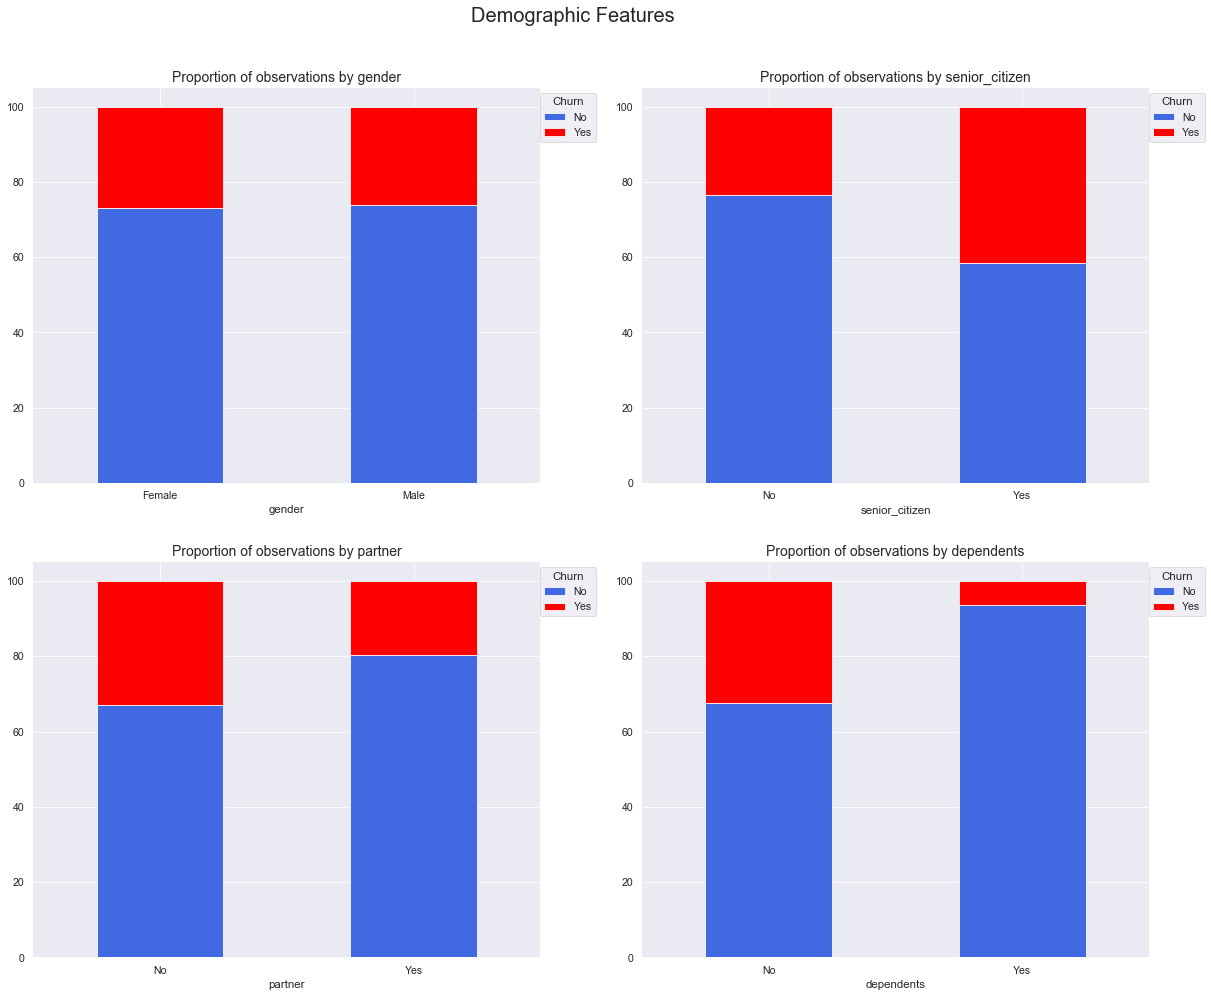

In [21]:
# Stack plots for Demographic Features
Demographic_features = ['gender', 'senior_citizen', 'partner', 'dependents']
percentage_stacked_plot(Demographic_features, 'Demographic Features')

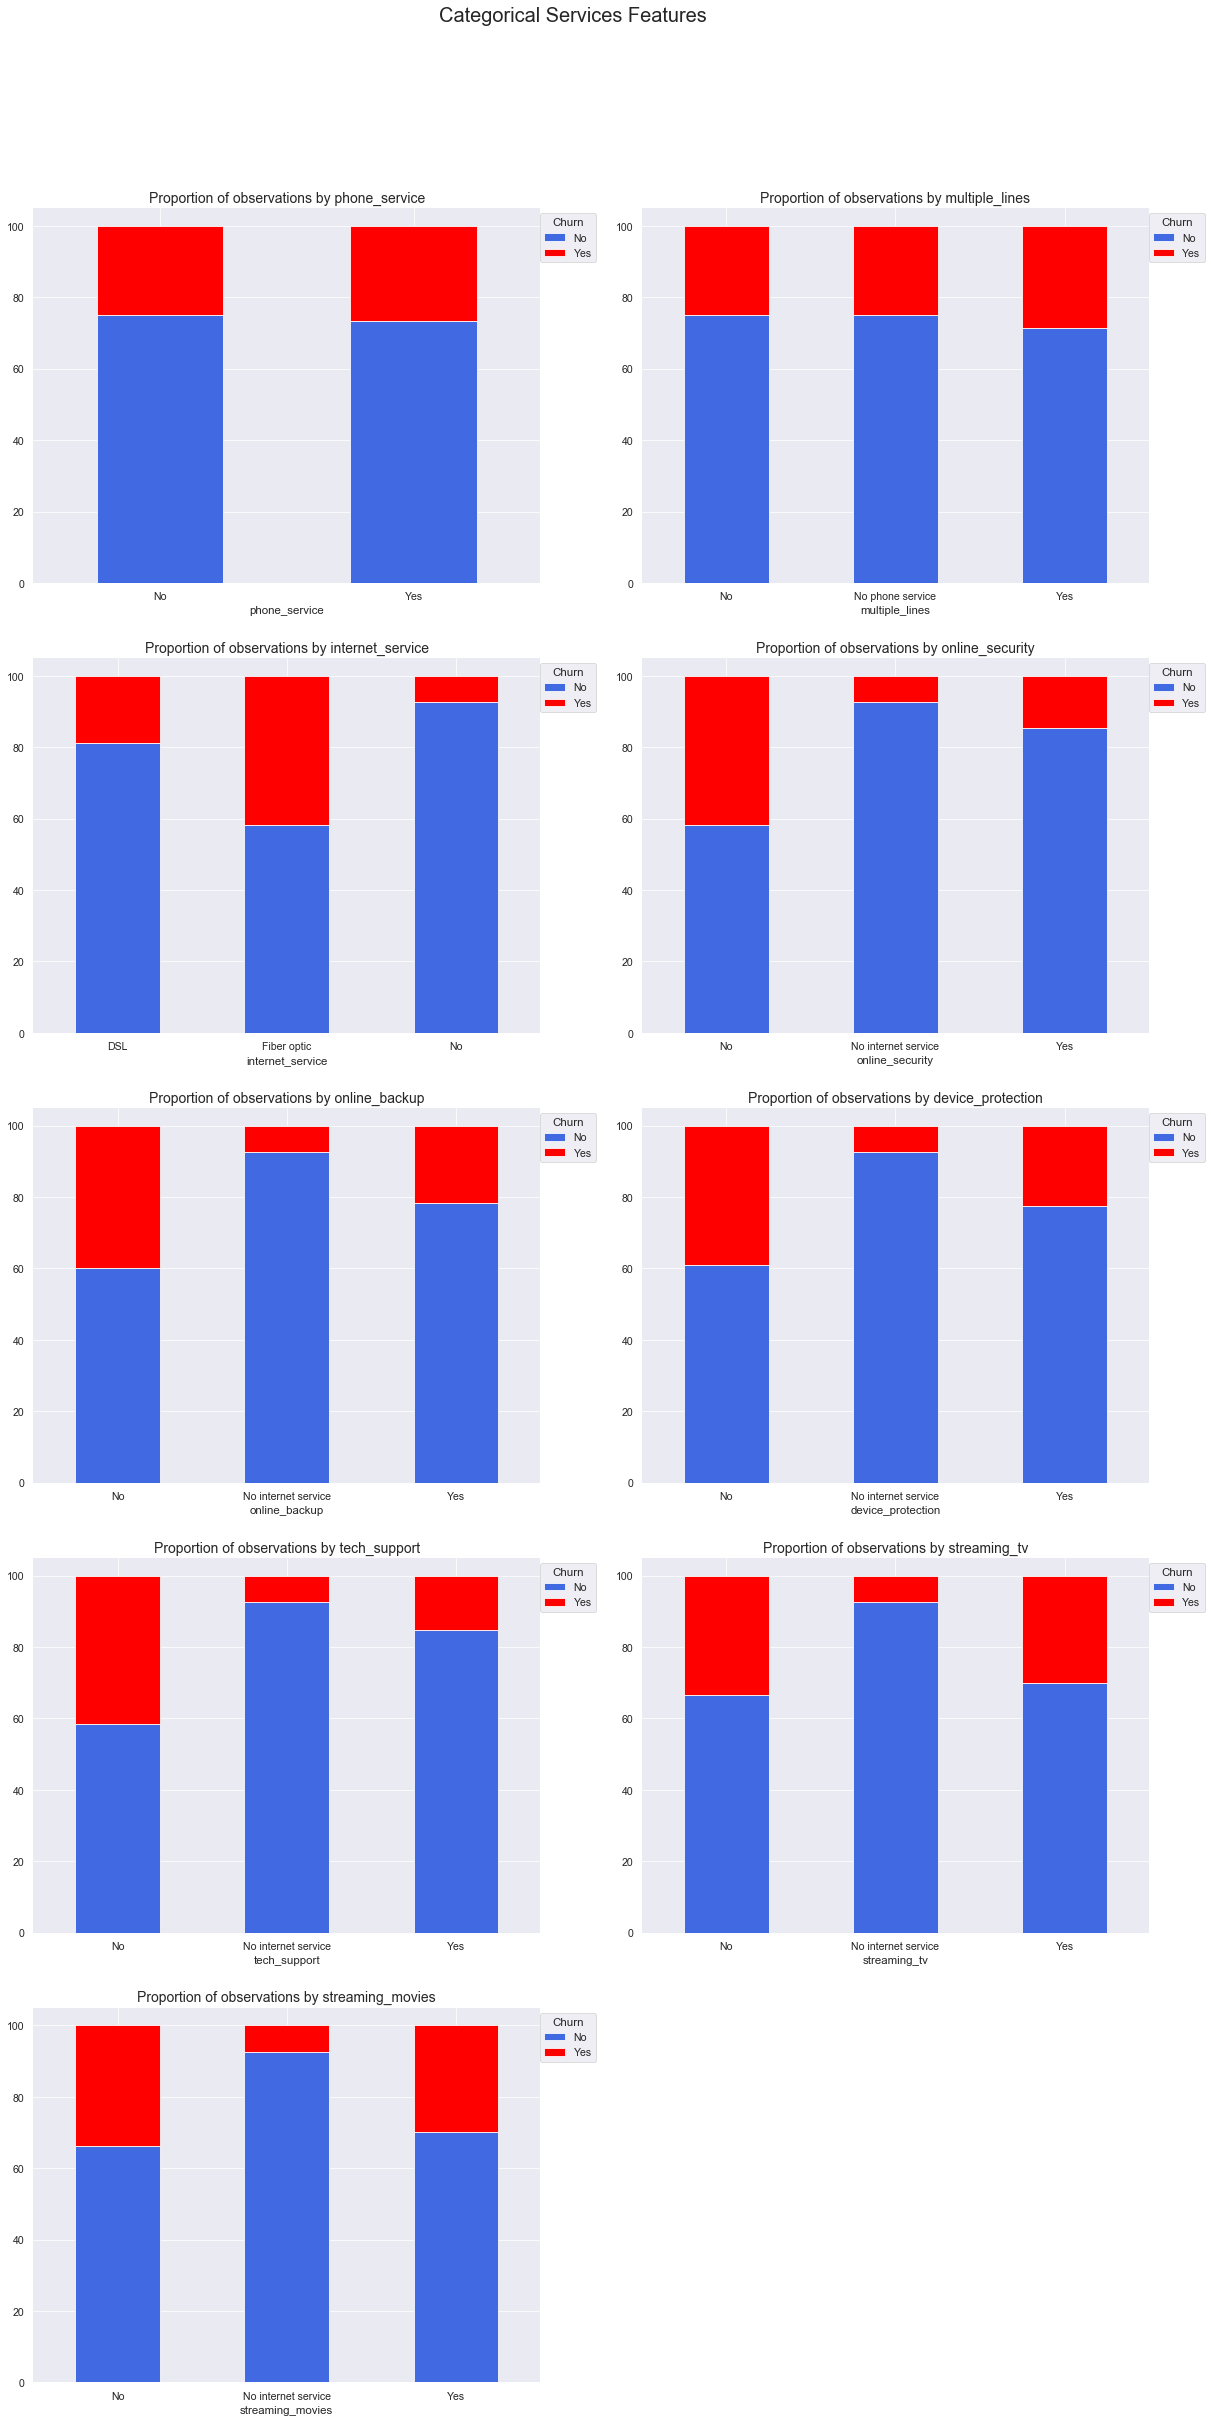

In [22]:
# Stack plots for Categorical Services Features
Services_features = ['phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies']
percentage_stacked_plot(Services_features, 'Categorical Services Features')

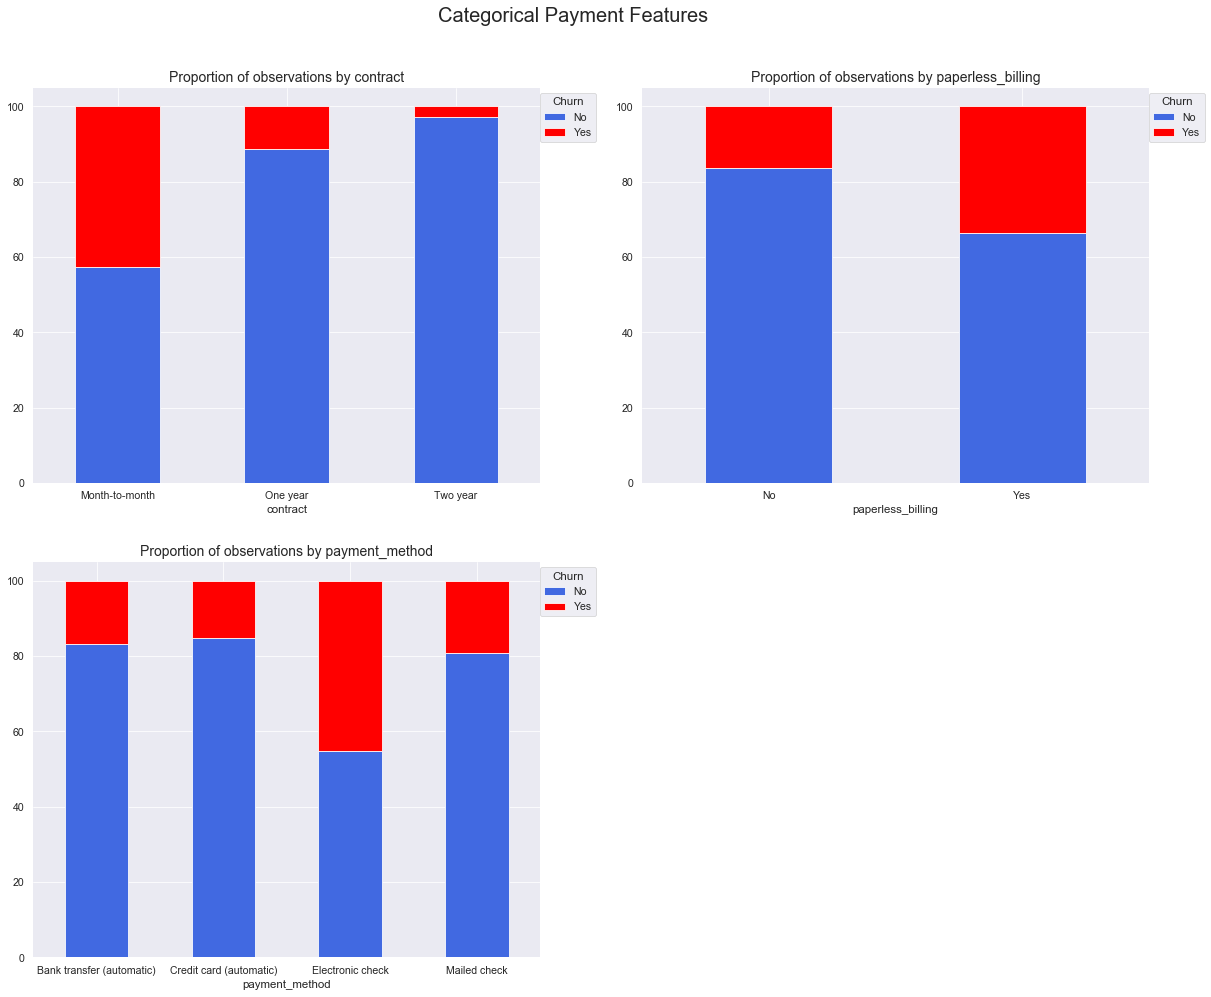

In [23]:
# Stack plots for payment features
Payment_features = ['contract', 'paperless_billing','payment_method']
percentage_stacked_plot(Payment_features, 'Categorical Payment Features')

In [24]:
# Store the demographic features in a list
Demographic_features = ['gender', 'senior_citizen', 'partner', 'dependents']

# Create a loop to use the bar_chart() function to create visaulizations for the demographic features
for feature in Demographic_features:
    bar_chart(feature,data)

**Summary**
- Gender and partner are distributed evenly. Female have slightly higher churn than males.
- Younger customers without partners and without dependents have a higher churn rate.
- In summary, the demographic section of data points to no-senior citizens without partners or dependents who are more likely to leave. 

###  Categorical Services Features

In [25]:
# Store the services features in a list
Services_features = ['phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies']

# Create a loop to use the bar_chart() function to create visaulizations for the services features
for feature in Services_features:
      bar_chart(feature,data)

**Summary**
- About 90.3% of the customers have phone services and have a higher rate to churn;
- The churn rate does not seem to be influenced by having multiple lines or not.
- Customers who have fiber optic as an internet service are more likely to churn. This can happen due to high prices, competition, customer service, and many other reasons. Fiber optic service is much more expensive than DSL, which may be one of the reasons why customers churn.
- Customers with OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport are more unlikely to churn.
- Streaming service is not predictive for churn as it is evenly distributed to yes and no options.

### Categorial Payment Features

In [26]:
# Store payment features in a list
Payment_features = ['contract', 'paperless_billing','payment_method']

#  Create a loop to use the bar_chart() function to create visaulizations for the payment features
for feature in Payment_features:
    bar_chart(feature,data)

**Summary**
- The shorter the contract, the higher the churn rate.
- About 60% of customers choose to have paperless bill, churn rate is also higher for the those customers.
- Electronic check customers are more likely to churn, and this type of payment is more common than other payment methods.

### Numercial Features

In [27]:
# Store in a list the numeric features
Numeric_features = ['tenure_months','monthly_charges', 'total_charges']

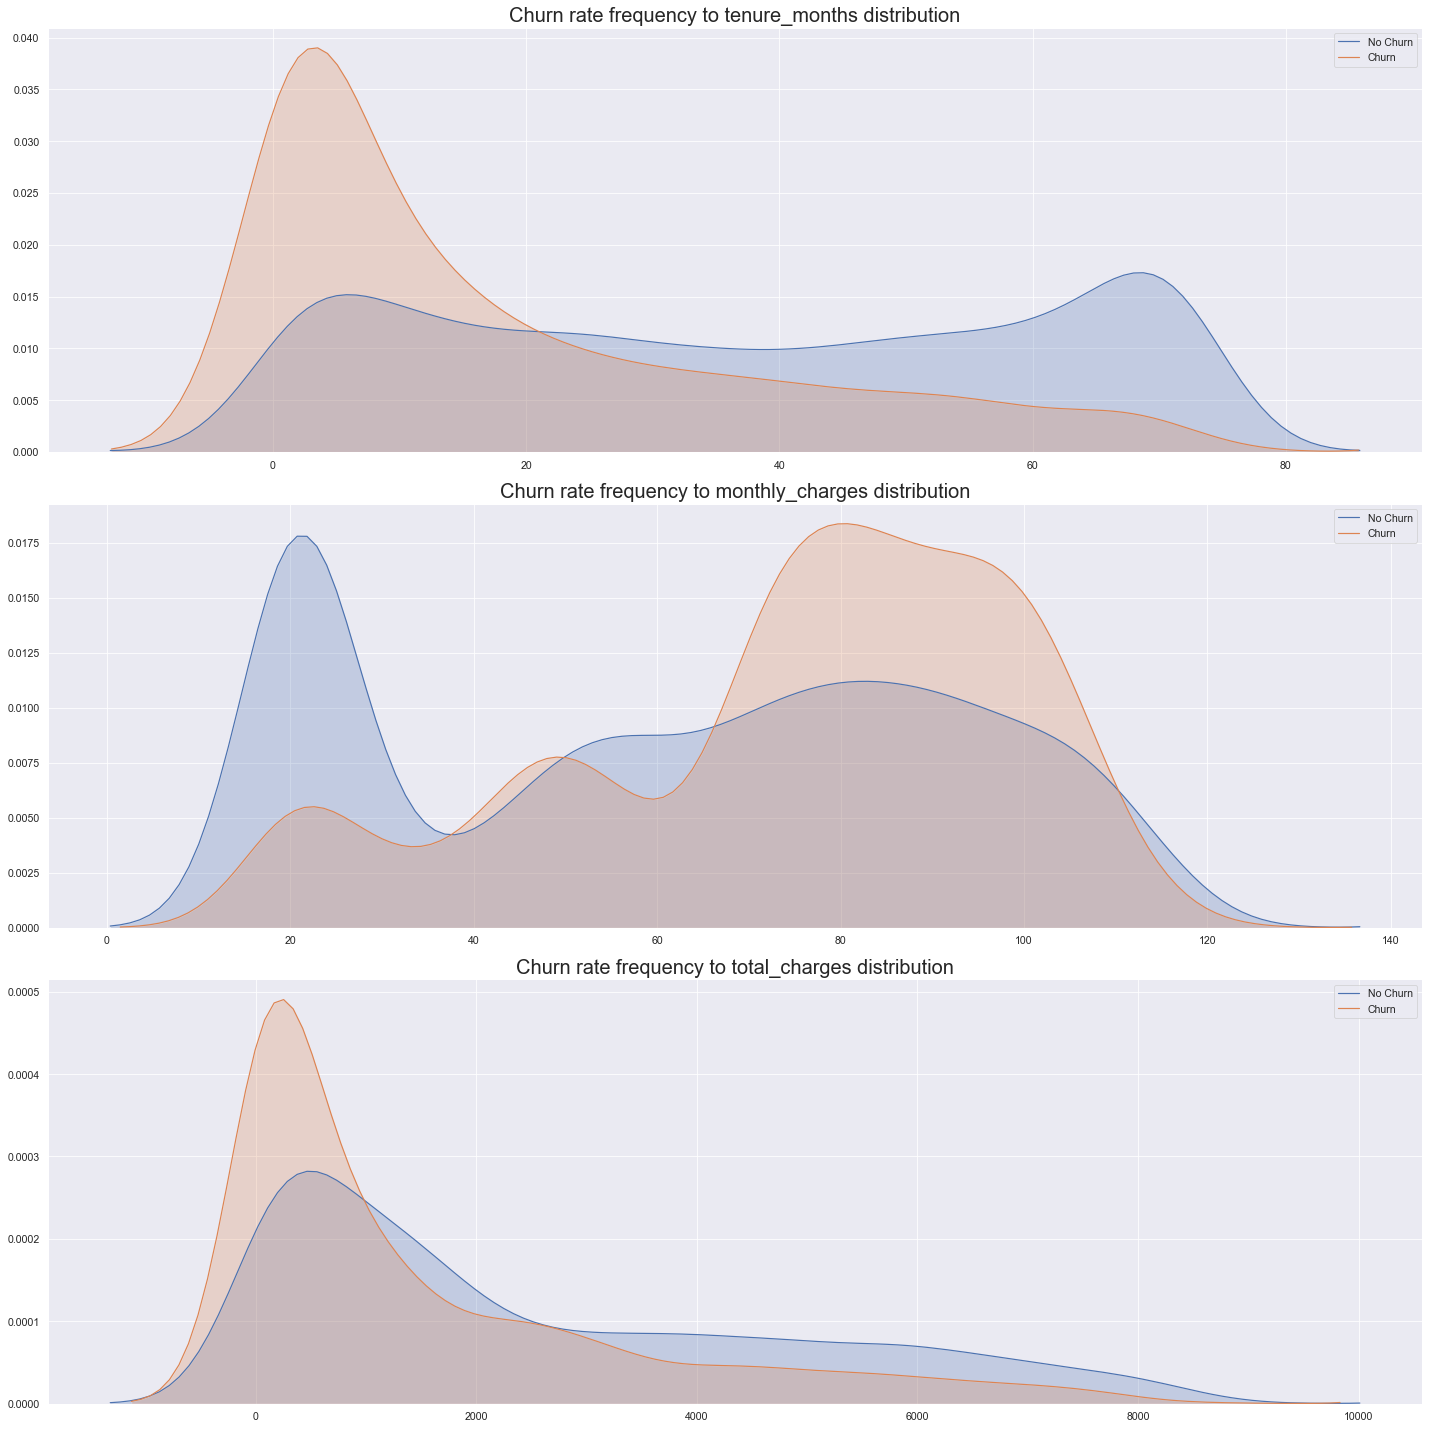

In [28]:
# Create distribution plots for each of the numeric features
plt.figure(figsize=(20,20))
for i,features in enumerate(Numeric_features):    
    plt.subplot(3,1,i + 1)    
    sns.kdeplot(data.loc[(data['churn_label'] == 'No'), features], label = 'No Churn', shade = True)
    sns.kdeplot(data.loc[(data['churn_label'] == 'Yes'), features], label = 'Churn', shade = True)
    plt.legend()
    plt.title(f'Churn rate frequency to {features} distribution',fontsize = 20)
    plt.tight_layout()

**Summary**

- The tenure_month plot is left skewed and shows that most of customers have been with the telecom company for the first 0-9 months. The highest rate of churn is also in the first few months.
- The monthly_charge plot shows that customers with higher monthly charges have a higher churn rate.
- The total_charge plot shows that low total charge has a higher churn rate.

### Data Encoding

In [29]:
#Defining the map function
def binary_map(feature):
    return feature.map({'Yes':1, 'No':0})
## Encoding target feature
data['churn_label'] = data[['churn_label']].apply(binary_map)
## Encoding other binary features
data['gender'] = data['gender'].map({'Male':1, 'Female':0})
binary_list = ['senior_citizen', 'partner', 'dependents', 'phone_service', 'paperless_billing']
data[binary_list] = data[binary_list].apply(binary_map)
## Encoding categorical features
data = pd.get_dummies(data, drop_first=True)

In [30]:
# Visualized the data
data.head()

gender  senior_citizen  partner  dependents  tenure_months  phone_service  \
0       1               0        0           0              2              1   
1       0               0        0           1              2              1   
2       0               0        0           1              8              1   
3       0               0        1           1             28              1   
4       1               0        0           1             49              1   

   paperless_billing  monthly_charges  total_charges  churn_label  \
0                  1          53.8500       108.1500            1   
1                  1          70.7000       151.6500            1   
2                  1          99.6500       820.5000            1   
3                  1         104.8000     3,046.0500            1   
4                  1         103.7000     5,036.3000            1   

   multiple_lines_No phone service  multiple_lines_Yes  \
0                                0                   0   
1                                0                   0   
2                                0                   1   
3                                0                   1   
4                                0                   1   

   internet_service_Fiber optic  internet_service_No  \
0                             0                    0   
1                             1                    0   
2                             1                    0   
3                             1                    0   
4                             1                    0   

   online_security_No internet service  online_security_Yes  \
0                                    0                    1   
1                                    0                    0   
2                                    0                    0   
3                                    0                    0   
4                                    0                    0   

   online_backup_No internet service  online_backup_Yes  \
0                                  0                  1   
1                                  0                  0   
2                                  0                  0   
3                                  0                  0   
4                                  0                  1   

   device_protection_No internet service  device_protection_Yes  \
0                                      0                      0   
1                                      0                      0   
2                                      0                      1   
3                                      0                      1   
4                                      0                      1   

   tech_support_No internet service  tech_support_Yes  \
0                                 0                 0   
1                                 0                 0   
2                                 0                 0   
3                                 0                 1   
4                                 0                 0   

   streaming_tv_No internet service  streaming_tv_Yes  \
0                                 0                 0   
1                                 0                 0   
2                                 0                 1   
3                                 0                 1   
4                                 0                 1   

   streaming_movies_No internet service  streaming_movies_Yes  \
0                                     0                     0   
1                                     0                     0   
2                                     0                     1   
3                                     0                     1   
4                                     0                     1   

   contract_One year  contract_Two year  \
0                  0                  0   
1                  0                  0   
2                  0                  0   
3                  0               

In [31]:
# Visualize the data type after the transformation
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   gender                                  7043 non-null   int64  
 1   senior_citizen                          7043 non-null   int64  
 2   partner                                 7043 non-null   int64  
 3   dependents                              7043 non-null   int64  
 4   tenure_months                           7043 non-null   int64  
 5   phone_service                           7043 non-null   int64  
 6   paperless_billing                       7043 non-null   int64  
 7   monthly_charges                         7043 non-null   float64
 8   total_charges                           7043 non-null   float64
 9   churn_label                             7043 non-null   int64  
 10  multiple_lines_No phone service         7043 non-null   uint

### Data Correlation

In [32]:
# Create a correlation heat map 
corr = data.corr()
fig = px.imshow(corr,width=1000, height=1000)
fig.show()

In [33]:
# Visualize the correlation between the churn label column and the rest of features
features = corr['churn_label'].sort_values(ascending=False).to_frame()
features

churn_label
churn_label                                  1.0000
internet_service_Fiber optic                 0.3080
payment_method_Electronic check              0.3019
monthly_charges                              0.1934
paperless_billing                            0.1918
senior_citizen                               0.1509
streaming_tv_Yes                             0.0632
streaming_movies_Yes                         0.0614
multiple_lines_Yes                           0.0401
phone_service                                0.0119
gender                                      -0.0086
multiple_lines_No phone service             -0.0119
device_protection_Yes                       -0.0662
online_backup_Yes                           -0.0823
payment_method_Mailed check                 -0.0917
payment_method_Credit card (automatic)      -0.1343
partner                                     -0.1504
tech_support_Yes                            -0.1647
online_security_Yes                         -0.1712
contract_One year                           -0.1778
total_charges                               -0.1983
online_backup_No internet service           -0.2279
online_security_No internet service         -0.2279
internet_service_No                         -0.2279
device_protection_No internet service       -0.2279
tech_support_No internet service            -0.2279
streaming_tv_No internet service            -0.2279
streaming_movies_No internet service        -0.2279
dependents                                  -0.2485
contract_Two year                           -0.3023
tenure_months                               -0.3523

In [34]:
# check for collinearity among potential predictors by pairs
df = (
     corr
     .stack()
     .reset_index()
     .sort_values(0, ascending=False)
)
# zip the default name columns level_0 and level_1
df['pairs'] = list(zip(df.level_0, df.level_1))
# set index to pairs
df.set_index(['pairs'], inplace=True)
# now drop level columns
df.drop(columns=['level_1', 'level_0'], inplace=True)
# rename correlation column rather than 0
df.columns = ['correlation']
# drop duplicates and keep only pair correlations above 0.65
df.drop_duplicates(inplace=True)
df[abs(df.correlation) > .60]

correlation
pairs                                                            
(gender, gender)                                           1.0000
(total_charges, tenure_months)                             0.8262
(internet_service_Fiber optic, monthly_charges)            0.7871
(monthly_charges, total_charges)                           0.6512
(streaming_tv_Yes, monthly_charges)                        0.6296
(monthly_charges, streaming_movies_Yes)                    0.6274
(online_backup_No internet service, monthly_charges)      -0.7636
(phone_service, multiple_lines_No phone service)          -1.0000

# Modeling

In [35]:
## Testing procedure for many models 

#Imports
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn .svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score


def createBaselineModels ():
  print('Creating baseline models ')
  models = {'LogisticRegression': LogisticRegression(solver='liblinear'),
            'GaussianNB': GaussianNB(),
            'KNeighborsClassifier': KNeighborsClassifier(n_neighbors = 2),
            'RandomForestClassifier': RandomForestClassifier(),
            'SVC kernel=linear': SVC(kernel='linear'),
            'SVC kernel=rbf': SVC(kernel='rbf'),
            'SVC kernel=poly': SVC(kernel='poly'),
            'AdaBoostClassifier': AdaBoostClassifier(n_estimators=20, random_state= 0),
            'ExtraTreesClassifier': ExtraTreesClassifier(n_estimators = 20),
            'BaggingClassifier': BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=20, random_state=7),
            'XGBClassifier': XGBClassifier()
            }
  print(models)          
  print('Baseline models creation concluded.')
  return models           


def fitModels(models, X_train, y_train):
  print('Fitting models ')
  for modelKey in models.keys():
    model = models.get(modelKey)
    model.fit(X_train, y_train)

   

#### Defining evaluation metrics and functions

The functions below define the evaluation metrics that are going to be use to evaluate and compare the performance of each model. 

In [36]:
#Structure of results for all models to be evaluated

#'Type of Classifier' , 'Accuracy' , 'Precision' , 'F1-Score' , 'Recall','ROC AUC Score'

def doScores(model, y_test, y_pred):
  cols = ('Type of Classifier' , 'TEST', 'ROC AUC', 'Recall', 'Precision' , 'Accuracy' ,  'F1-Score' ,  'TPR', 'FPR')
  scores = []
  scores.append(model)
  scores.append('Single Train/Test')
   
  scores.append(roc_auc_score(y_test, y_pred))
  scores.append(recall_score(y_test, y_pred,labels=[1,2], average='micro'))
  scores.append(precision_score(y_test, y_pred))
  scores.append(accuracy_score(y_test, y_pred))
  scores.append(f1_score(y_test, y_pred))

  fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
  scores.append(tpr[1])
  scores.append(fpr[1])

  df = pd.DataFrame(columns = cols)
  df.loc[len(df)] = scores
  #print(scores)
  return df



# Evaluate a score by cross-validation.
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

def doCrossValScores(modelKey, model, X_train, y_train):
  
  rkf = KFold(n_splits=5, random_state=1, shuffle=True) 

 
  cols = ('Type of Classifier' , 'TEST', 'ROC AUC', 'Recall', 'Precision' , 'Accuracy' ,  'F1-Score' )
  #cols = ('Type of Classifier' ,'ROC AUC' , 'Recall')
  scores = []
  scores.append(modelKey)
  scores.append('K Fold Cross Validation')
  
  results = cross_val_score(model, X_train, y_train, cv=rkf, scoring='roc_auc')
  scores.append(results.mean())

  results = cross_val_score(model, X_train, y_train, cv=rkf, scoring='recall')
  scores.append(results.mean())

  results = cross_val_score(model, X_train, y_train, cv=rkf, scoring='precision')
  scores.append(results.mean())
  results = cross_val_score(model, X_train, y_train, cv=rkf, scoring='accuracy')
  scores.append(results.mean())
  results = cross_val_score(model, X_train, y_train, cv=rkf, scoring='f1')
  scores.append(results.mean())

  #print(scores)
  df = pd.DataFrame(columns = cols)
  df.loc[len(df)] = scores
  #print(scores)
  return df



# Evaluate models in a list
# Use cross = 0 for simple evaluation or cross=1 to cross validation.
def evaluateModels(models, X_test, y_test, cross = 0):
  # Predicting and evaluating

    scores = pd.DataFrame()
    print('Evaluating models ')
    for modelKey in models.keys():
        print('Evaluating model ', models.get(modelKey))
        model = models.get(modelKey)
    
      #print(modelKey, y_pred)
        if (cross == 0):
            y_pred = model.predict(X_test) 
            score = doScores(modelKey, y_test, y_pred)
        else: 
            score = doCrossValScores(modelKey, model, X_test, y_test)
        if (len(scores) == 0): 
            scores = score
        else:
            scores = scores.append(score, ignore_index=True)
    #print('Model ', models.get(modelKey), 'evaluation concluded.')
    #print(scores)
    scores = scores.sort_values(by=['Accuracy'], ascending=False)
    return scores




# Plot a ROC curve with all results obtained
from sklearn import metrics

def plotROC(results):
  results=results.sort_values(by=['ROC AUC'], ascending=False)
  plt.figure(figsize=(10, 7))
  for index, row in results.iterrows():
      modelKey = row['Type of Classifier']
      tpr = row['TPR']
      fpr = row['FPR']
      auc = row['ROC AUC']
      tpr = [0,tpr,1]
      fpr = [0,fpr,1]
      plt.plot(fpr,tpr,label=modelKey+" - AUC="+"{:.2f}".format(auc))

  #create ROC curve
  plt.title('Receiver Optimizing Curve - ROC')  
  plt.plot([0, 1], [0, 1], color='blue',  linestyle='--')
  plt.grid(color='black', linestyle='-', linewidth=0.5)
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()



# Plot the Accuracy Score results obtained
def plotAccuraryGraph(results):
  res=results.sort_values(by=['Accuracy'], ascending=False)
  fig = plt.figure(figsize=(8, 5))
  ax = fig.add_axes([0,0,1,1])
  ax.bar(res['Type of Classifier'],res['Accuracy'])
  #results.plot(0,1,kind='bar', title = 'Accuracy Scores')
  plt.title('Accuracy Scores Ranking')  
  plt.ylabel('Accuracy')
  plt.xlabel('Models')
  plt.xticks(rotation = 45)
  #plt.axis([-1, len(res), res['Accuracy'].min(), res['Accuracy'].max()])
  plt.show()



In [37]:
# Select the target
y = data['churn_label']

In [38]:
# Select the features
X = data.drop(columns = 'churn_label')

In [39]:
# Split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42)

In [40]:
# Check train test split size
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 30), (1409, 30), (5634,), (1409,))

In [41]:
# Scaling the numerical features
scaler = StandardScaler()
scaler.fit(X_train[Numeric_features])
X_train[Numeric_features] = scaler.transform(X_train[Numeric_features])
X_test[Numeric_features] = scaler.transform(X_test[Numeric_features])

______

### Baseline Models Evaluation (Simple evaluation with fixed Train/Test set)

For the baseline of the project, we are initialy evaluating the following models with basic hyper-parameters:

* LogisticRegression
* GaussianNB
* KNeighborsClassifier
* RandomForestClassifier
* SVC kernel=linear
* SVC kernel=rbf
* SVC kernel=poly
* AdaBoostClassifier
* ExtraTreesClassifier
* BaggingClassifier
* XGBClassifier


Creating baseline models 
{'LogisticRegression': LogisticRegression(solver='liblinear'), 'GaussianNB': GaussianNB(), 'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=2), 'RandomForestClassifier': RandomForestClassifier(), 'SVC kernel=linear': SVC(kernel='linear'), 'SVC kernel=rbf': SVC(), 'SVC kernel=poly': SVC(kernel='poly'), 'AdaBoostClassifier': AdaBoostClassifier(n_estimators=20, random_state=0), 'ExtraTreesClassifier': ExtraTreesClassifier(n_estimators=20), 'BaggingClassifier': BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=20,
                  random_state=7), 'XGBClassifier': XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=

Type of Classifier               TEST  ROC AUC  Recall  Precision  \
0       LogisticRegression  Single Train/Test   0.7332  0.5775     0.6526   
5           SVC kernel=rbf  Single Train/Test   0.7097  0.5160     0.6587   
7       AdaBoostClassifier  Single Train/Test   0.7250  0.5668     0.6366   
4        SVC kernel=linear  Single Train/Test   0.7197  0.5535     0.6369   
6          SVC kernel=poly  Single Train/Test   0.7001  0.4920     0.6595   
3   RandomForestClassifier  Single Train/Test   0.7065  0.5241     0.6302   
9        BaggingClassifier  Single Train/Test   0.6972  0.5027     0.6267   
10           XGBClassifier  Single Train/Test   0.7099  0.5455     0.6108   
8     ExtraTreesClassifier  Single Train/Test   0.6833  0.4786     0.6068   
2     KNeighborsClassifier  Single Train/Test   0.6192  0.3128     0.6031   
1               GaussianNB  Single Train/Test   0.7401  0.8503     0.4536   

    Accuracy  F1-Score    TPR    FPR  
0     0.8062    0.6128 0.5775 0.1111  
5     0.8006    0.5787 0.5160 0.0966  
7     0.7991    0.5997 0.5668 0.1169  
4     0.7977    0.5923 0.5535 0.1140  
6     0.7977    0.5636 0.4920 0.0918  
3     0.7921    0.5723 0.5241 0.1111  
9     0.7885    0.5579 0.5027 0.1082  
10    0.7871    0.5763 0.5455 0.1256  
8     0.7793    0.5351 0.4786 0.1121  
2     0.7630    0.4120 0.3128 0.0744  
1     0.6884    0.5916 0.8503 0.3700

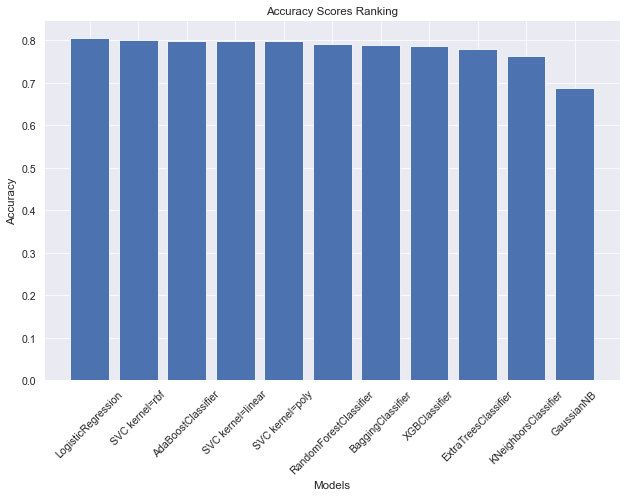

 ROC Curve 



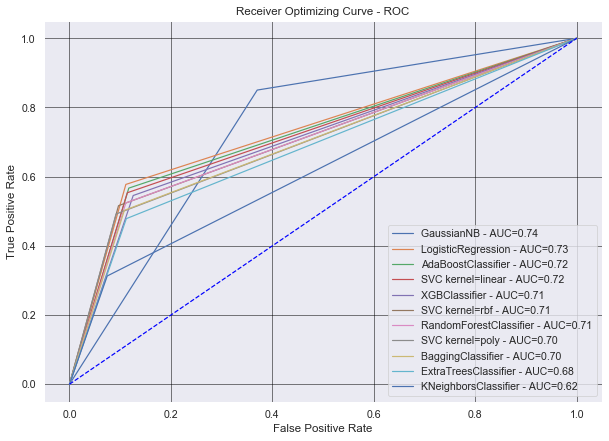

In [42]:
#Creat list of baseline models
models = createBaselineModels()

#fit models with Train Data
fitModels(models,X_train, y_train)

#Storte the result in a variable
results =  (evaluateModels(models,  X_test,  y_test, 0))
display(results)
print(' \n')

# Accuracy chart
plotAccuraryGraph(results)

# Plot the ROC Curve for the models
print(' ROC Curve \n')
plotROC(results)


___

In [ ]:
s

### Model Exploration

After creating a baseline, we selected five models to work on them and find the best model for our problem:

* LogisticRegression
* DecisionTree
* SVC
* RandomForestClassifier
* XGBClassifier


## Logistic Regression

In [43]:
# Build the model
Lr_clf = LogisticRegression()

In [44]:
# Select the parameter for Grid Search
param_grid_Lr = {"tol":[0.001,0.0001,0.00001],
                 "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                 "penalty":['l1', 'l2', 'elasticnet', 'none'],
                 "solver": ['linear', 'saga'],
                 'class_weight' : [None, 'balanced', 
                                         {1:2, 0:1}, {1:3, 0:1}, {1:5, 0:1}]}

In [45]:
# Perfom Grid Search
GridSearchCV_LR = GridSearchCV(estimator=Lr_clf, 
                               param_grid=param_grid_Lr, 
                               cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                               verbose=1, 
                               n_jobs=-1,
                               scoring = 'roc_auc',
                               return_train_score=True)

In [46]:
# Fit Grid Search
GridSearchCV_LR.fit(X_train, y_train)

Fitting 5 folds for each of 840 candidates, totalling 4200 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': [None, 'balanced', {0: 1, 1: 2},
                                          {0: 1, 1: 3}, {0: 1, 1: 5}],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['linear', 'saga'],
                         'tol': [0.001, 0.0001, 1e-05]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [47]:
# Find the best parameters for Logistic Regression
Best_params_Lr = GridSearchCV_LR.best_params_
Best_params_Lr

{'C': 0.1,
 'class_weight': {1: 2, 0: 1},
 'penalty': 'none',
 'solver': 'saga',
 'tol': 0.001}

In [48]:
# Build the model with the best parameters
Lr_clf_best = LogisticRegression(**Best_params_Lr)

In [49]:
# Train the model
Lr_clf_best.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight={0: 1, 1: 2}, penalty='none',
                   solver='saga', tol=0.001)

In [50]:
# Test the model
y_pred_train = Lr_clf_best.predict(X_train)
y_pred_test= Lr_clf_best.predict(X_test)

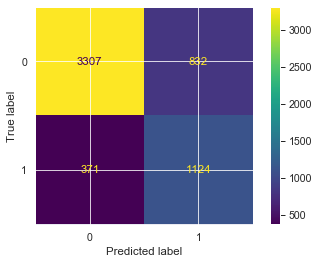

In [51]:
# plotting confusion matrix for training data
plot_confusion_matrix(Lr_clf_best, X_train, y_train)
plt.show()

In [52]:
# Print classification report 
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1035
           1       0.55      0.73      0.63       374

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.78      1409



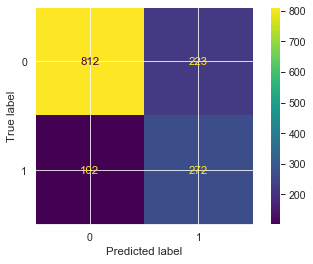

In [53]:
# plotting confusion matrix for testing data
plot_confusion_matrix(Lr_clf_best, X_test, y_test)
plt.show()

In [54]:
# Create a function to print the AUC for training and testing data
def fpr_tpr_auc(y,y_hat,clf):
    fpr, tpr, auc_thresholds = roc_curve(y, y_hat)
    print('{} Model AUC: {}'.format(clf,round(auc(fpr, tpr), 3)))
    return fpr, tpr, auc_thresholds

In [55]:
# LR - AUC Score
fpr_tpr_auc_train = fpr_tpr_auc(y_train,y_pred_train,'Logistic Regression traing')
fpr_tpr_auc_tetst = fpr_tpr_auc(y_test,y_pred_test, 'Logistic Regression test')

Logistic Regression traing Model AUC: 0.775
Logistic Regression test Model AUC: 0.756


In [56]:
# Create a function to plot the ROC Curve for the train and testing data set 
def Roc_curve(train,test,label=None):
    sns.set_style('whitegrid')
    plt.figure(figsize=(10, 8))
    lw = 2
    # ROC curve for training set
    plt.plot(train[0], train[1], color='blue',
         lw=lw, label='Train ROC curve')
    # ROC curve for test set
    plt.plot(test[0], test[1], color='red',
         lw=lw, label='Test ROC curve')
    
    plt.plot([0, 1], [0, 1], color='orange', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc='lower right')
#    print('Training AUC: {}'.format(auc(train[0], train[1])))
#    print('Test AUC:{}'.format(auc(test[0], test[1])))
    plt.show()

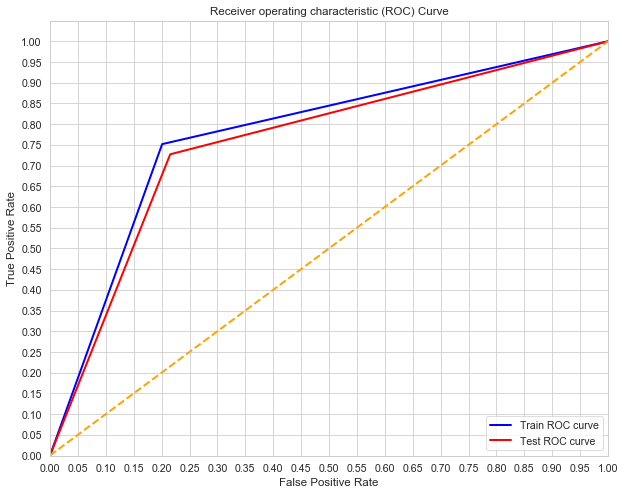

In [57]:
# plot the ROC Area Under Curve for Logistic Regression
Roc_curve(fpr_tpr_auc_train, fpr_tpr_auc_tetst, 'Logistic Regression')

## Decision Tree

In [58]:
# Build the model
tree_clf = DecisionTreeClassifier()

In [59]:
# Select the parameters for Grid Search
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None,1, 2, 5, 10,20],
    'min_samples_split': [5,6,7,8,9],
    'min_samples_leaf': [1, 2, 3, 4],
    'class_weight' : [None, 'balanced', {1:2, 0:1}, {1:3, 0:1}, {1:5, 0:1}]
    
}

In [60]:
# Perfom Grid Search
GridSearchCV_tree = GridSearchCV(estimator=tree_clf, 
                                param_grid=param_grid_tree, 
                                cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                                verbose = 1,
                                n_jobs = -1,
                                scoring = 'roc_auc',
                                return_train_score=True
                                )
# Fit Grid Search
GridSearchCV_tree.fit(X_train,y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced', {0: 1, 1: 2},
                                          {0: 1, 1: 3}, {0: 1, 1: 5}],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [5, 6, 7, 8, 9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [61]:
#Find the best parameters for Decision Tree
Best_params_tree = GridSearchCV_tree.best_params_
Best_params_tree

{'class_weight': {1: 2, 0: 1},
 'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [62]:
# Build the model with the best parameters
tree_clf_best = DecisionTreeClassifier(**Best_params_tree)

In [63]:
# Train the model
tree_clf_best.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 2}, criterion='entropy',
                       max_depth=5, min_samples_split=5)

In [64]:
# Predict using the model
y_pred_train = tree_clf_best.predict(X_train)
y_pred_test= tree_clf_best.predict(X_test)

In [65]:
# Print classification report for training data
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.90      0.80      0.84      4139
           1       0.57      0.74      0.65      1495

    accuracy                           0.78      5634
   macro avg       0.73      0.77      0.74      5634
weighted avg       0.81      0.78      0.79      5634



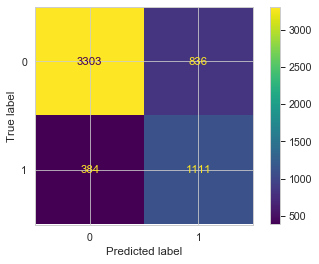

In [66]:
# plotting confusion matrix
plot_confusion_matrix(tree_clf_best, X_train, y_train)
plt.show()

In [67]:
# Print classification report for testing data
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1035
           1       0.56      0.73      0.63       374

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.78      1409



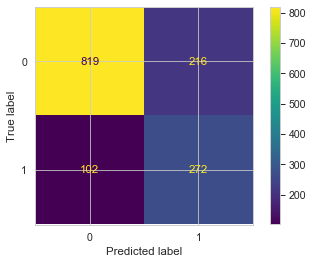

In [68]:
# plotting confusion matrix for testing data
plot_confusion_matrix(tree_clf_best, X_test, y_test)
plt.show()

In [69]:
# DT - AUC Score
fpr_tpr_auc_train = fpr_tpr_auc(y_train,y_pred_train,'Decision Tree training')
fpr_tpr_auc_tetst = fpr_tpr_auc(y_test,y_pred_test, 'Decision Tree test')

Decision Tree training Model AUC: 0.771
Decision Tree test Model AUC: 0.759


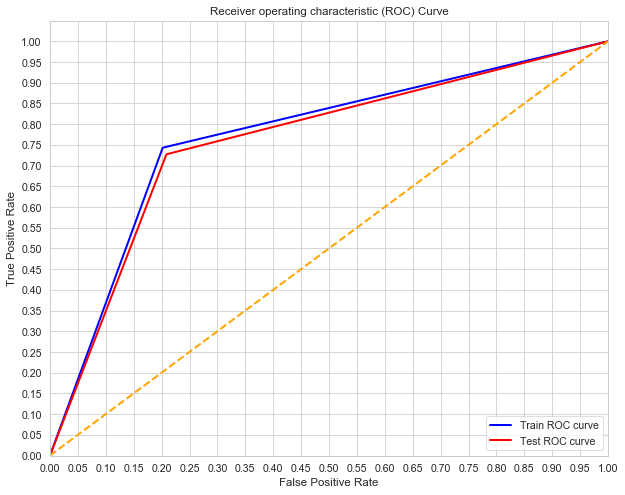

In [70]:
# plot the ROC Area Under Curve for Logistic Regression
Roc_curve(fpr_tpr_auc_train ,fpr_tpr_auc_tetst)

_____

## SVM

In [71]:
# Build the model
Svc_clf = SVC()

In [72]:
# Select the parameters for Grid Search
param_grid_SVM = {"C":[0.5,1,2,3,5], 
                  "tol":[0.001,0.0001,0.00001],
                  "kernel":['linear','rbf','poly'],
                  'class_weight' : [None, 'balanced', {1:2, 0:1}, {1:3, 0:1}, {1:5, 0:1}]
                  }

In [73]:
# Perfom Grid Search
GridSearchCV_SVM = GridSearchCV(estimator=Svc_clf, 
                                param_grid=param_grid_SVM, 
                                cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                                verbose=1, 
                                n_jobs=-1,
                                scoring = 'roc_auc',
                                return_train_score=True
                                )

In [74]:
# Fit model with train data
GridSearchCV_SVM.fit(X_train, y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.5, 1, 2, 3, 5],
                         'class_weight': [None, 'balanced', {0: 1, 1: 2},
                                          {0: 1, 1: 3}, {0: 1, 1: 5}],
                         'kernel': ['linear', 'rbf', 'poly'],
                         'tol': [0.001, 0.0001, 1e-05]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [75]:
# Find the best parameters for SVM
Best_params_Svc = GridSearchCV_SVM.best_params_
Best_params_Svc

{'C': 3, 'class_weight': {1: 2, 0: 1}, 'kernel': 'linear', 'tol': 1e-05}

In [76]:
# Build the model with the best parameters

Svc_clf_best = SVC(**Best_params_Svc)

In [77]:
# Train the model
Svc_clf_best.fit(X_train,y_train)

SVC(C=3, class_weight={0: 1, 1: 2}, kernel='linear', tol=1e-05)

In [78]:
y_pred_train = Svc_clf_best.predict(X_train)

In [79]:
# Test the model
y_pred_test = Svc_clf_best.predict(X_test)

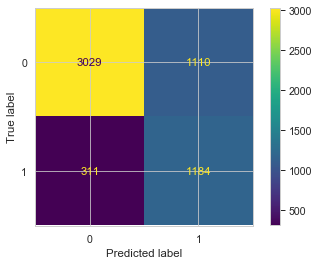

In [80]:
# plotting confusion matrix
plot_confusion_matrix(Svc_clf_best, X_train, y_train)
plt.show()

In [81]:
# Print classification report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      4139
           1       0.52      0.79      0.62      1495

    accuracy                           0.75      5634
   macro avg       0.71      0.76      0.72      5634
weighted avg       0.80      0.75      0.76      5634



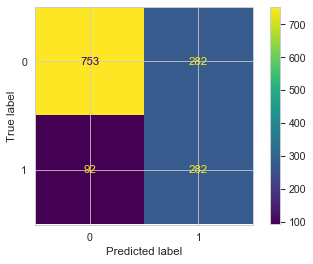

In [82]:
# plotting confusion matrix
plot_confusion_matrix(Svc_clf_best, X_test, y_test)
plt.show()

In [83]:
# Print classification report for testing data
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1035
           1       0.50      0.75      0.60       374

    accuracy                           0.73      1409
   macro avg       0.70      0.74      0.70      1409
weighted avg       0.79      0.73      0.75      1409



In [84]:
# SVM - AUC Score

fpr_tpr_auc_train = fpr_tpr_auc(y_train,y_pred_train,'SVM training')
fpr_tpr_auc_tetst = fpr_tpr_auc(y_test,y_pred_test, 'SVM test')

SVM training Model AUC: 0.762
SVM test Model AUC: 0.741


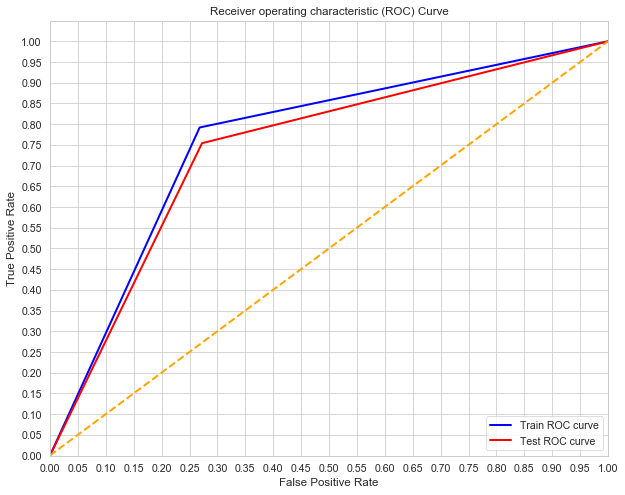

In [85]:
# plot the ROC Area Under Curve for SVM
Roc_curve(fpr_tpr_auc_train ,fpr_tpr_auc_tetst)

## Random Forest

In [86]:
# Build the model
Rf_clf = RandomForestClassifier()

In [87]:
# define the grid for Random Forest
param_grid_Rf = [{'criterion': ['gini', 'entropy'], # measures split quality
                   'class_weight': ['balanced'], # adjust imbalanced positive class
                   'n_estimators': [50, 100, 200, 500], # number trees to grow            
                   'max_features': ['auto', 6, None], # features considered at splits
                   'max_depth': [4, 6, 8, 10],  # max nodes in each tree
                   'min_samples_leaf': [5, 10, 15], # samples required in each leaf
                   'min_samples_split': [0.1, 0.2, 0.3, 0.4], # percentage required to split node
                    }]

In [88]:
# Perfom Grid Search
GridSearchCV_RF = GridSearchCV(estimator=Rf_clf, 
                                param_grid=param_grid_Rf, 
                                cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                                verbose=1, 
                                n_jobs=-1,
                                scoring = 'roc_auc',
                                return_train_score=True
                                )

In [89]:
# Fit model with train data
GridSearchCV_RF.fit(X_train, y_train);

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


In [90]:
# Find the best parameters for Random Forest
Best_params_Rf = GridSearchCV_RF.best_params_
Best_params_Rf

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 0.1,
 'n_estimators': 100}

In [91]:
# Build the model with the best parameters
Rf_clf_best = RandomForestClassifier(**Best_params_Rf)

In [92]:
# Train the model
Rf_clf_best.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, max_features=6,
                       min_samples_leaf=5, min_samples_split=0.1)

In [93]:
y_pred_train = Rf_clf_best.predict(X_train)
# Test the model
y_pred_test = Rf_clf_best.predict(X_test)

In [94]:
# Print classification report for trainig data
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.92      0.75      0.82      4139
           1       0.54      0.82      0.65      1495

    accuracy                           0.76      5634
   macro avg       0.73      0.78      0.74      5634
weighted avg       0.82      0.76      0.78      5634



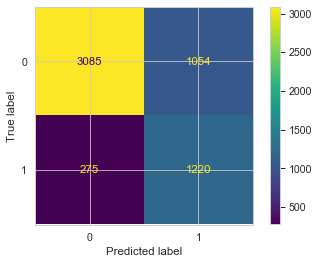

In [95]:
# plotting confusion matrix for trainind data
plot_confusion_matrix(Rf_clf_best, X_train, y_train)
plt.show()

In [96]:
# Print classification report for testing data
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1035
           1       0.52      0.79      0.63       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409



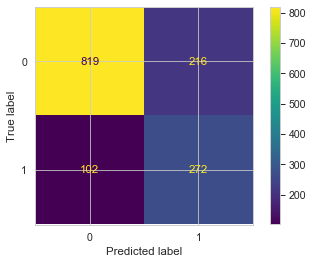

In [97]:
# plotting confusion matrix f
plot_confusion_matrix(tree_clf_best, X_test, y_test)
plt.show()

In [98]:
# RF - AUC Score
fpr_tpr_auc_train = fpr_tpr_auc(y_train,y_pred_train,'Random Forest training')
fpr_tpr_auc_tetst = fpr_tpr_auc(y_test,y_pred_test, 'Random Forest test')

Random Forest training Model AUC: 0.781
Random Forest test Model AUC: 0.763


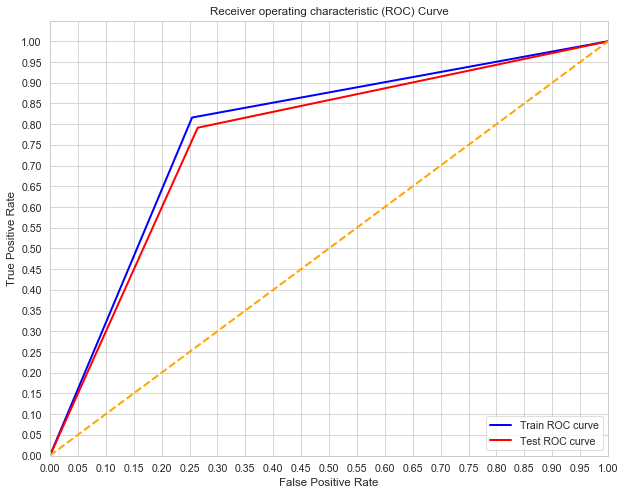

In [99]:
# plot the ROC Area Under Curve for Logistic Regression
Roc_curve(fpr_tpr_auc_train ,fpr_tpr_auc_tetst)

_________

## XGB Classifier

In [100]:
# Build the model
xgb_clf = XGBClassifier()

# define the grid for XGB Classifier
xgb_params = {}
xgb_params['n_estimators'] = [10, 50 , 100, 500 , 1000]
xgb_params['learning_rate'] = [0.1, 0.3, 0.5]
xgb_params['max_depth'] = [4,5,6]
xgb_params['min_child_weight'] = [5, 20,100]
xgb_params['subsample'] = [0.5, 0.8]
xgb_params['scale_pos_weight'] = [1.5, 20, 50 ,100]
xgb_params['use_label_encoder'] = [True,False]
xgb_params['num_boost_round'] = [100]
xgb_params['early_stopping_rounds'] = [10]
xgb_params['maximize'] = [True]

# Perfom Grid Search
GridSearchCV_xgb = GridSearchCV(estimator=xgb_clf, 
                                param_grid=xgb_params, 
                                cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                                verbose = 1000, n_jobs = 4, scoring = 'roc_auc',
                                return_train_score=True
                                )
# Fit model with train data
GridSearchCV_xgb.fit(X_train,y_train)
# Build the model with the best parameters
Best_params_xgb = GridSearchCV_xgb.best_params_
Best_params_xgb

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits
[02:28:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "early_stopping_rounds", "maximize", "num_boost_round" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:28:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'early_stopping_rounds': 10,
 'learning_rate': 0.1,
 'max_depth': 4,
 'maximize': True,
 'min_child_weight': 5,
 'n_estimators': 50,
 'num_boost_round': 100,
 'scale_pos_weight': 1.5,
 'subsample': 0.8,
 'use_label_encoder': True}

In [101]:
# Build the model with the best parameters
XGB_clf_best = XGBClassifier(**Best_params_xgb)

In [102]:
# Train the model
XGB_clf_best.fit(X_train,y_train)

[02:28:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "early_stopping_rounds", "maximize", "num_boost_round" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:28:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=10,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4, maximize=True,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=12, num_boost_round=100,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1.5, subsample=0.8,
              tree_method='exact', validate_parameters=1, ...)

In [103]:
y_pred_train = XGB_clf_best.predict(X_train)
# Test the model
y_pred_test = XGB_clf_best.predict(X_test)

In [104]:
# Print classification report for trainig data
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      4139
           1       0.65      0.72      0.68      1495

    accuracy                           0.82      5634
   macro avg       0.77      0.79      0.78      5634
weighted avg       0.83      0.82      0.82      5634



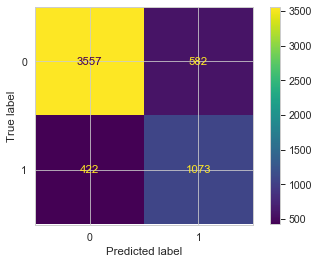

In [105]:
# plotting confusion matrix for trainind data
plot_confusion_matrix(XGB_clf_best, X_train, y_train)
plt.show()

In [106]:
# Print classification report for testing data
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86      1035
           1       0.60      0.68      0.64       374

    accuracy                           0.79      1409
   macro avg       0.74      0.76      0.75      1409
weighted avg       0.81      0.79      0.80      1409



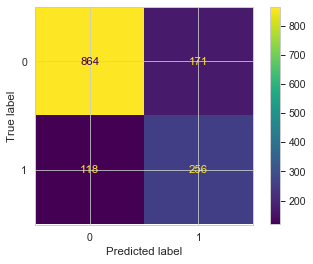

In [107]:
# plotting confusion matrix f
plot_confusion_matrix(XGB_clf_best, X_test, y_test)
plt.show()

In [108]:
# RF - AUC Score
fpr_tpr_auc_train = fpr_tpr_auc(y_train,y_pred_train,'XGB training')
fpr_tpr_auc_tetst = fpr_tpr_auc(y_test,y_pred_test, 'XGB Forest test')

XGB training Model AUC: 0.789
XGB Forest test Model AUC: 0.76


______

### AdaBoosting

In [109]:
# Build the model
ada_clf = AdaBoostClassifier()

# define the grid for AdaBoosting
ada_params = {}
ada_params['n_estimators'] = [10,20,50,100,500]
ada_params['learning_rate'] = [0.1,0.3,0.5]
ada_params['algorithm'] = ['SAMME', 'SAMME.R']

# Perfom Grid Search
GridSearchCV_ada = GridSearchCV(estimator=ada_clf, 
                                param_grid=ada_params, 
                                cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                                verbose = 1000, n_jobs = 4, scoring = 'roc_auc',
                                return_train_score=True
                                )
# Fit model with train data
GridSearchCV_ada.fit(X_train,y_train)
Best_params_ada = GridSearchCV_ada.best_params_
Best_params_ada

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'algorithm': 'SAMME.R', 'learning_rate': 0.3, 'n_estimators': 100}

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      4139
           1       0.68      0.57      0.62      1495

    accuracy                           0.82      5634
   macro avg       0.77      0.74      0.75      5634
weighted avg       0.81      0.82      0.81      5634



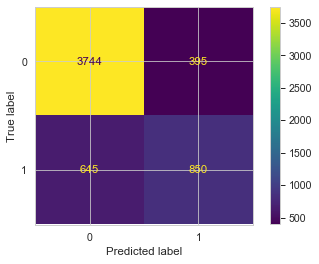

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.66      0.55      0.60       374

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



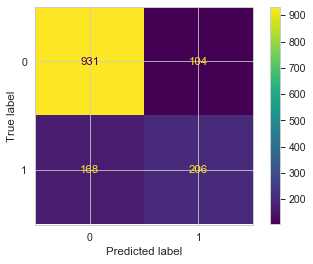

Decision ada training Model AUC: 0.737
Decision ada test Model AUC: 0.725


In [111]:
# Build the model with the best parameters
ada_clf_best = AdaBoostClassifier(**Best_params_ada)
ada_clf_best.fit(X_train,y_train)

# Train the model
y_pred_train = ada_clf_best.predict(X_train)
y_pred_test= ada_clf_best.predict(X_test)

# Print classification report for trainig data
print(classification_report(y_train, y_pred_train))

# plotting confusion matrix
plot_confusion_matrix(ada_clf_best, X_train, y_train)
plt.show()
# Print classification report for testing data
print(classification_report(y_test, y_pred_test))

# plotting confusion matrix
plot_confusion_matrix(ada_clf_best, X_test, y_test)
plt.show()

# RF - AUC Score
fpr_tpr_auc_train = fpr_tpr_auc(y_train,y_pred_train,'Decision ada training')
fpr_tpr_auc_tetst = fpr_tpr_auc(y_test,y_pred_test, 'Decision ada test')

In [38]:
# Create a function with the best parameter for each model
def createAdvancedModels():
  print('Creating advanced models ')
  lr_params = {'C': 10,
                'class_weight': {1: 2, 0: 1},
                #'penalty': 'none',
                'solver': 'saga',
                'tol': 0.0001,
                'solver':'liblinear'}
  
  dtree_params = {'class_weight': {1: 2, 0: 1},
                    'criterion': 'entropy',
                    'max_depth': 5,
                    'min_samples_leaf': 1,
                    'min_samples_split': 5}

  svc_params = {'C': 1, 'class_weight': {1: 2, 0: 1},
                'kernel': 'linear', 'tol': 0.001}
 
  rf_params = {'class_weight': 'balanced',
    'criterion': 'gini',
    'max_depth': 8,
    'max_features': 6,
    'min_samples_leaf': 10,
    'min_samples_split': 0.1,
    'n_estimators': 100}
 
  xgb_params = {'learning_rate': 0.01,
     'max_depth': 4,
     'min_child_weight': 50,
     'n_estimators': 1000,
     'scale_pos_weight': 4.0,
     'subsample': 0.5,
     'eval_metric':'logloss'}
  
  ada_params={'algorithm':'SAMME.R',
             'learning_rate':0.3,
             'n_estimators':100}
 
  models = {'LogisticRegression': LogisticRegression(**lr_params),
            #'DecisionTreeClassifier': DecisionTreeClassifier(**dtree_params),
            'SVC': SVC(**svc_params),
            'RandomForestClassifier':RandomForestClassifier(**rf_params),
            'AdaBoostClassifier': AdaBoostClassifier(**ada_params),
            'XGBClassifier': XGBClassifier(**xgb_params)
            }  
  #print(models)          
  print('Advanced models creation concluded.')
  return models

### Models summary with the best parameters

Creating advanced models 
Advanced models creation concluded.
Fitting models 
Evaluating models 
Evaluating model  LogisticRegression(C=10, class_weight={0: 1, 1: 2}, solver='liblinear')
Evaluating model  SVC(C=1, class_weight={0: 1, 1: 2}, kernel='linear')
Evaluating model  RandomForestClassifier(class_weight='balanced', max_depth=8, max_features=6,
                       min_samples_leaf=10, min_samples_split=0.1)
Evaluating model  AdaBoostClassifier(learning_rate=0.3, n_estimators=100)
Evaluating model  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=4, min_child_weight=50, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=12,
              num_parallel_tree=1, predictor='au

Type of Classifier               TEST  ROC AUC  Recall  Precision  \
3      AdaBoostClassifier  Single Train/Test   0.7252  0.5508     0.6645   
0      LogisticRegression  Single Train/Test   0.7554  0.7273     0.5484   
2  RandomForestClassifier  Single Train/Test   0.7671  0.8048     0.5181   
1                     SVC  Single Train/Test   0.7408  0.7540     0.5000   
4           XGBClassifier  Single Train/Test   0.7749  0.8610     0.5000   

   Accuracy  F1-Score    TPR    FPR  
3    0.8070    0.6023 0.5508 0.1005  
0    0.7686    0.6253 0.7273 0.2164  
2    0.7495    0.6304 0.8048 0.2705  
1    0.7346    0.6013 0.7540 0.2725  
4    0.7346    0.6326 0.8610 0.3111

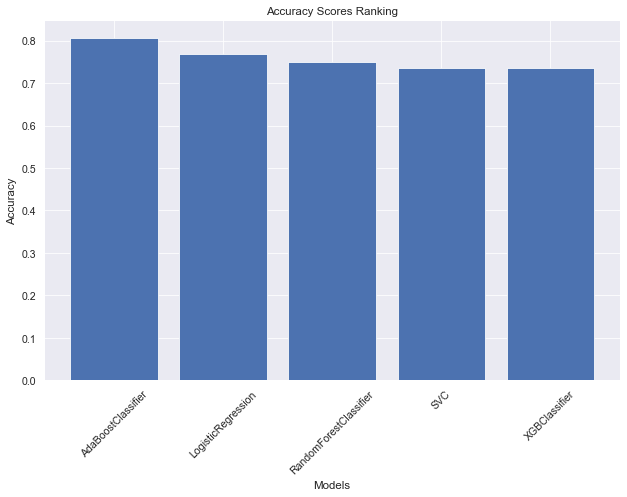

 ROC Curve 



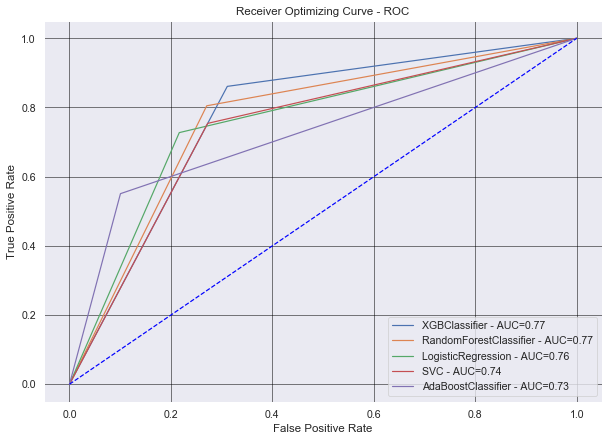

In [43]:
#Creat list of baseline models
advanced_models = createAdvancedModels()

#fit models with Train Data
fitModels(advanced_models,X_train, y_train)
results =  (evaluateModels(advanced_models,  X_test,  y_test, 0))
display(results)
plotAccuraryGraph(results)
print(' ROC Curve \n')
plotROC(results)


In [44]:
#Creat list of baseline models
advanced_models = createAdvancedModels()
#Evaluate using Cross Validation
results =  (evaluateModels(advanced_models,  X_train, y_train, 1))
display(results.sort_values(by="Recall", ascending=False))
print(' \n')

Creating advanced models 
Advanced models creation concluded.
Evaluating models 
Evaluating model  LogisticRegression(C=10, class_weight={0: 1, 1: 2}, solver='liblinear')
Evaluating model  SVC(C=1, class_weight={0: 1, 1: 2}, kernel='linear')
Evaluating model  RandomForestClassifier(class_weight='balanced', max_depth=8, max_features=6,
                       min_samples_leaf=10, min_samples_split=0.1)
Evaluating model  AdaBoostClassifier(learning_rate=0.3, n_estimators=100)
Evaluating model  XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, eval_metric='logloss', gamma=None,
              gpu_id=None, importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_delta_step=None, max_depth=4,
              min_child_weight=50, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
        

Type of Classifier                     TEST  ROC AUC  Recall  \
4           XGBClassifier  K Fold Cross Validation   0.8623  0.8578   
2  RandomForestClassifier  K Fold Cross Validation   0.8529  0.8053   
1                     SVC  K Fold Cross Validation   0.8551  0.7849   
0      LogisticRegression  K Fold Cross Validation   0.8592  0.7510   
3      AdaBoostClassifier  K Fold Cross Validation   0.8607  0.5570   

   Precision  Accuracy  F1-Score  
4     0.5093    0.7425    0.6385  
2     0.5324    0.7570    0.6400  
1     0.5237    0.7526    0.6276  
0     0.5745    0.7856    0.6502  
3     0.6791    0.8124    0.6114

### Best Models droping features ending with "No internet service"

In [40]:
no_internet_features =[]
for feature in data.columns:
    if feature.endswith('No internet service'):
        no_internet_features.append(feature)
    else:
        continue
no_internet_features
# Drop the target
X_not_in = data.drop(columns = 'churn_label', axis =1)
# Drop "No_internet_features"
X_not_in = X_not_in.drop(columns = no_internet_features , axis =1)
# Split into training and test datasets

X_train, X_test, y_train, y_test = train_test_split(X_not_in, y, test_size=0.20, stratify=y, random_state=42)

# Scale the data
scaler = StandardScaler()
scaler.fit(X_train[Numeric_features])
X_train[Numeric_features] = scaler.transform(X_train[Numeric_features])
X_test[Numeric_features] = scaler.transform(X_test[Numeric_features])

#Creat list of baseline models
advanced_models = createAdvancedModels()


Creating advanced models 
Advanced models creation concluded.


Fitting models 
Evaluating models 
Evaluating model  LogisticRegression(C=10, class_weight={0: 1, 1: 2}, solver='liblinear')
Evaluating model  SVC(C=1, class_weight={0: 1, 1: 2}, kernel='linear')
Evaluating model  RandomForestClassifier(class_weight='balanced', max_depth=8, max_features=6,
                       min_samples_leaf=10, min_samples_split=0.1)
Evaluating model  AdaBoostClassifier(learning_rate=0.3, n_estimators=100)
Evaluating model  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=4, min_child_weight=50, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, 

Type of Classifier               TEST  ROC AUC  Recall  Precision  \
3      AdaBoostClassifier  Single Train/Test   0.7252  0.5508     0.6645   
0      LogisticRegression  Single Train/Test   0.7554  0.7273     0.5484   
2  RandomForestClassifier  Single Train/Test   0.7612  0.7620     0.5347   
1                     SVC  Single Train/Test   0.7408  0.7540     0.5000   
4           XGBClassifier  Single Train/Test   0.7749  0.8610     0.5000   

   Accuracy  F1-Score    TPR    FPR  
3    0.8070    0.6023 0.5508 0.1005  
0    0.7686    0.6253 0.7273 0.2164  
2    0.7608    0.6284 0.7620 0.2396  
1    0.7346    0.6013 0.7540 0.2725  
4    0.7346    0.6326 0.8610 0.3111

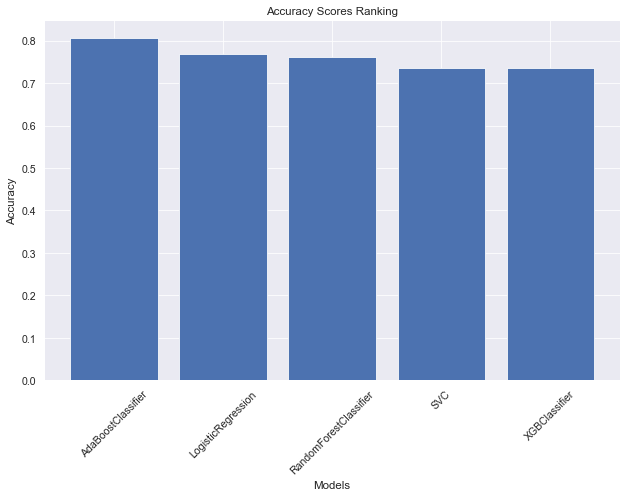

 ROC Curve 



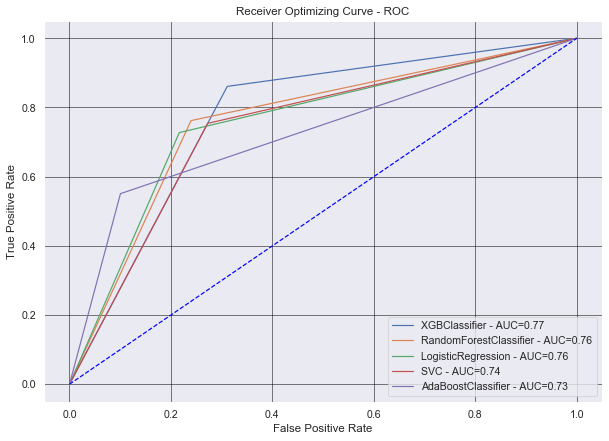

In [45]:
#fit models with Train Data
fitModels(advanced_models,X_train, y_train)
results =  (evaluateModels(advanced_models,  X_test,  y_test, 0))
display(results)
plotAccuraryGraph(results)
print(' ROC Curve \n')
plotROC(results)

In [41]:
#Evaluate using Cross Validation
results =  (evaluateModels(advanced_models,  X_train, y_train, 1))
display(results.sort_values(by="Recall", ascending=False))
print(' \n')

Evaluating models 
Evaluating model  LogisticRegression(C=10, class_weight={0: 1, 1: 2}, solver='liblinear')
Evaluating model  SVC(C=1, class_weight={0: 1, 1: 2}, kernel='linear')
Evaluating model  RandomForestClassifier(class_weight='balanced', max_depth=8, max_features=6,
                       min_samples_leaf=10, min_samples_split=0.1)
Evaluating model  AdaBoostClassifier(learning_rate=0.3, n_estimators=100)
Evaluating model  XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, eval_metric='logloss', gamma=None,
              gpu_id=None, importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_delta_step=None, max_depth=4,
              min_child_weight=50, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
     

Type of Classifier                     TEST  ROC AUC  Recall  \
4           XGBClassifier  K Fold Cross Validation   0.8623  0.8578   
2  RandomForestClassifier  K Fold Cross Validation   0.8541  0.7975   
1                     SVC  K Fold Cross Validation   0.8545  0.7849   
0      LogisticRegression  K Fold Cross Validation   0.8592  0.7510   
3      AdaBoostClassifier  K Fold Cross Validation   0.8607  0.5570   

   Precision  Accuracy  F1-Score  
4     0.5093    0.7425    0.6385  
2     0.5375    0.7652    0.6433  
1     0.5239    0.7528    0.6278  
0     0.5742    0.7854    0.6500  
3     0.6791    0.8124    0.6114

### Best Models using several sampling techniques

In [40]:
# This code tests the best models using several sampling techniques
def createSampligModels ():
  print('Creating Sampling models ')
  models = {'NearMiss1': NearMiss(version=1, n_neighbors=3),
            'NearMiss2': NearMiss(version=2, n_neighbors=3),
            'NearMiss3': NearMiss(version=3, n_neighbors=3),
            #'CondensedNearestNeighbour': CondensedNearestNeighbour(n_neighbors=1),
            'TomekLinks': TomekLinks(),
            'EditedNearestNeighbours': EditedNearestNeighbours(n_neighbors=3),
            'OneSidedSelection': OneSidedSelection(n_neighbors=1, n_seeds_S=200),
            'SMOTE': SMOTE()
            }    
  #print(models)          
  print('Undersamplig Models creation concluded.')
  return models 


no_internet_features =[]
for feature in data.columns:
    if feature.endswith('No internet service'):
        no_internet_features.append(feature)
    else:
        continue
no_internet_features
# Drop the target
X_not_in = data.drop(columns = 'churn_label', axis =1)
# Drop "No_internet_features"
X_not_in = X_not_in.drop(columns = no_internet_features , axis =1)
# Split into training and test datasets

X_train, X_test, y_train, y_test = train_test_split(X_not_in, y, test_size=0.20, stratify=y, random_state=42)

samplingModels = createSampligModels()
results = pd.DataFrame()

for sampModel in samplingModels.keys():
    print('Testing Sampling model:', sampModel)
    
    sampling = samplingModels.get(sampModel)

    X_train, y_train = sampling.fit_resample(X_train,y_train)
    

    #X_train, X_test, y_train, y_test = train_test_split(data.drop(columns = 'churn_label'), y, test_size=0.20, stratify=y, random_state=42)
    # Scaling the numerical features
    scaler = StandardScaler()
    scaler.fit(X_train[Numeric_features])
    X_train[Numeric_features] = scaler.transform(X_train[Numeric_features])
    X_test[Numeric_features] = scaler.transform(X_test[Numeric_features])

    #Creat list of baseline models
    advanced_models = createAdvancedModels()

    #fit models with Train Data
    fitModels(advanced_models,X_train, y_train)
    
    result =  (evaluateModels(advanced_models,  X_test,  y_test, 0))
    result['SampleModel'] = sampModel
    
    results = pd.concat([results,result], axis = 0)
    
    #plotAccuraryGraph(results)
    #print(' ROC Curve \n')
    #plotROC(results)
results = results
display(results.sort_values(by="ROC AUC", ascending=False))

Creating Sampling models 
Undersamplig Models creation concluded.
Testing Sampling model: NearMiss1
Creating advanced models 
Advanced models creation concluded.
Fitting models 
Evaluating models 
Evaluating model  LogisticRegression(C=10, class_weight={0: 1, 1: 2}, solver='liblinear')
Evaluating model  SVC(C=1, class_weight={0: 1, 1: 2}, kernel='linear')
Evaluating model  RandomForestClassifier(class_weight='balanced', max_depth=8, max_features=6,
                       min_samples_leaf=10, min_samples_split=0.1)
Evaluating model  AdaBoostClassifier(learning_rate=0.3, n_estimators=100)
Evaluating model  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=4, min_child_weight=50, missing=nan,
              monot

Type of Classifier               TEST  ROC AUC  Recall  Precision  \
3      AdaBoostClassifier  Single Train/Test   0.7395  0.7968     0.4753   
3      AdaBoostClassifier  Single Train/Test   0.7317  0.7620     0.4798   
3      AdaBoostClassifier  Single Train/Test   0.7317  0.7620     0.4798   
3      AdaBoostClassifier  Single Train/Test   0.7249  0.6952     0.5058   
2  RandomForestClassifier  Single Train/Test   0.7160  0.7460     0.4619   
2  RandomForestClassifier  Single Train/Test   0.7159  0.7487     0.4605   
2  RandomForestClassifier  Single Train/Test   0.7157  0.7540     0.4578   
0      LogisticRegression  Single Train/Test   0.7086  0.8422     0.4172   
2  RandomForestClassifier  Single Train/Test   0.7071  0.7273     0.4564   
0      LogisticRegression  Single Train/Test   0.6922  0.8636     0.3944   
0      LogisticRegression  Single Train/Test   0.6790  0.8449     0.3854   
0      LogisticRegression  Single Train/Test   0.6790  0.8449     0.3854   
2  RandomForestClassifier  Single Train/Test   0.6673  0.9385     0.3596   
1                     SVC  Single Train/Test   0.6641  0.8663     0.3678   
1                     SVC  Single Train/Test   0.6641  0.8663     0.3678   
1                     SVC  Single Train/Test   0.6641  0.8663     0.3678   
1                     SVC  Single Train/Test   0.6641  0.8663     0.3678   
2  RandomForestClassifier  Single Train/Test   0.6437  0.9492     0.3413   
2  RandomForestClassifier  Single Train/Test   0.6424  0.8636     0.3503   
0      LogisticRegression  Single Train/Test   0.6389  0.9492     0.3381   
0      LogisticRegression  Single Train/Test   0.6385  0.9465     0.3381   
1                     SVC  Single Train/Test   0.6294  0.9439     0.3324   
1                     SVC  Single Train/Test   0.6271  0.9519     0.3302   
1                     SVC  Single Train/Test   0.6140  0.9893     0.3195   
3      AdaBoostClassifier  Single Train/Test   0.6074  0.9278     0.3198   
0      LogisticRegression  Single Train/Test   0.6059  0.9866     0.3151   
3      AdaBoostClassifier  Single Train/Test   0.6053  0.9198     0.3191   
3      AdaBoostClassifier  Single Train/Test   0.5988  0.9492     0.3133   
4           XGBClassifier  Single Train/Test   0.5947  0.9412     0.3115   
4           XGBClassifier  Single Train/Test   0.5913  0.9198     0.3107   
4           XGBClassifier  Single Train/Test   0.5859  0.9332     0.3069   
4           XGBClassifier  Single Train/Test   0.5831  0.9305     0.3055   
4           XGBClassifier  Single Train/Test   0.5678  0.9840     0.2953   
4           XGBClassifier  Single Train/Test   0.5606  0.9840     0.2918   
4           XGBClassifier  Single Train/Test   0.5335  0.9840     0.2794   

   Accuracy  F1-Score    TPR    FPR              SampleModel  
3    0.7126    0.5954 0.7968 0.3179               TomekLinks  
3    0.7175    0.5888 0.7620 0.2986                NearMiss1  
3    0.7175    0.5888 0.7620 0.2986                NearMiss2  
3    0.7388    0.5856 0.6952 0.2454                NearMiss3  
2    0.7019    0.5706 0.7460 0.3140               TomekLinks  
2    0.7005    0.5703 0.7487 0.3169                NearMiss1  
2    0.6977    0.5697 0.7540 0.3227                NearMiss3  
0    0.6458    0.5580 0.8422 0.4251                NearMiss3  
2    0.6977    0.5608 0.7273 0.3130                NearMiss2  
0    0.6118    0.5415 0.8636 0.4792               TomekLinks  
0    0.6011    0.5293 0.8449 0.4870                NearMiss2  
0    0.6011    0.5293 0.8449 0.4870                NearMiss1  
2    0.5401    0.5200 0.9385 0.6039                    SMOTE  
1    0.5692    0.5163 0.8663 0.5382                NearMiss3  
1    0.5692    0.5163 0.8663 0.5382                NearMiss2  
1    0.5692    0.5163 0.8663 0.5382                NearMiss1  
1    0.5692    0.5163 0.8663 0.5382               TomekLinks  
2    0.5004    0.5021 0.9492 0.6618        OneSidedSelection  
2    0.5387    0.4985 0.8636 0.5787  EditedNearestNeighbours  
0    0.493

#### Summary:
    
There is not improvement in the relevant metrics after applying sampling techniques.

In [49]:
def createFinalModels():
  print('Creating final models ')
  #lr_params = {'C': 10,
                #'class_weight': {1: 2, 0: 1},
                #'solver': 'saga',
                #'tol': 0.0001,
                #'solver':'liblinear'}
  
  #dtree_params = {'class_weight': {1: 2, 0: 1},
                    #'criterion': 'entropy',
                    #'max_depth': 5,
                    #'min_samples_leaf': 1,
                    #'min_samples_split': 5}

  svc_params = {'C': 1, 'class_weight': {1: 2, 0: 1},
                'kernel': 'linear', 'tol': 0.001,
                 'probability':True}
 
  rf_params = {'class_weight': 'balanced',
    'criterion': 'gini',
    'max_depth': 8,
    'max_features': 6,
    'min_samples_leaf': 10,
    'min_samples_split': 0.1,
    'n_estimators': 100}
 
  xgb_params = {'learning_rate': 0.01,
     'max_depth': 4,
     'min_child_weight': 50,
     'n_estimators': 1000,
     'scale_pos_weight': 4.0,
     'subsample': 0.5,
     'eval_metric':'logloss'}
  
  #ada_params={'algorithm':'SAMME.R',
             #'learning_rate':0.3,
             #'n_estimators':100}
  
  # Ensemble the three best models
  estimators= []
  estimators.append(('XGBClassifier', XGBClassifier(**xgb_params)))
  estimators.append(('SVC',SVC(**svc_params)))
  estimators.append(('RandomForestClassifier',RandomForestClassifier(**rf_params))) 
   
  # Create the ensemble momdel
  ensemble = VotingClassifier(estimators, voting='soft')

  models = {'Ensemble': ensemble,
            'XGBClassifier': XGBClassifier(**xgb_params)
            }  
  #print(models)          
  print('Final models creation concluded.')
  return models

### Emsemble model vs Best Model (XGBClassifier)

Creating final models 
Final models creation concluded.
Fitting models 
Evaluating models 
Evaluating model  VotingClassifier(estimators=[('XGBClassifier',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            enable_categorical=False,
                                            eval_metric='logloss', gamma=None,
                                            gpu_id=None, importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.01,
                                            max_delta_step=None, max_depth=4,
                                            min_child_weight=50, mis...
                                            reg_alp

Type of Classifier               TEST  ROC AUC  Recall  Precision  Accuracy  \
0           Ensemble  Single Train/Test   0.7515  0.7406     0.5296    0.7566   
1      XGBClassifier  Single Train/Test   0.7749  0.8610     0.5000    0.7346   

   F1-Score    TPR    FPR  
0    0.6176 0.7406 0.2377  
1    0.6326 0.8610 0.3111

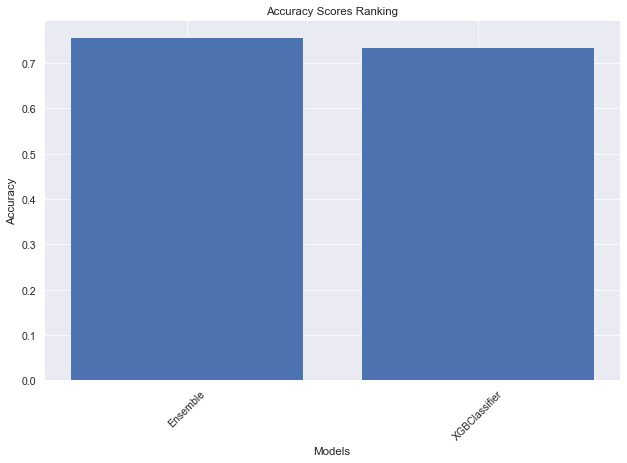

 ROC Curve 



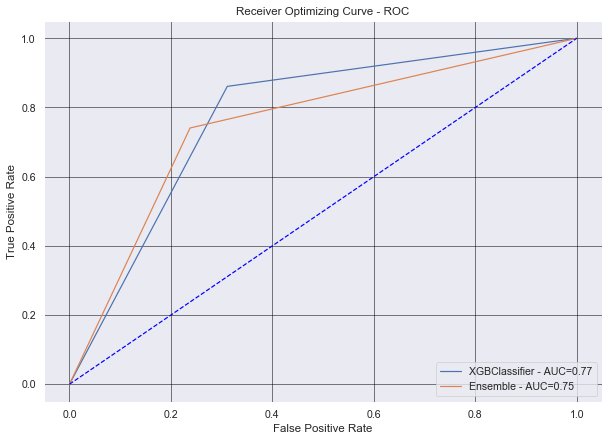

Evaluating models 
Evaluating model  VotingClassifier(estimators=[('XGBClassifier',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            enable_categorical=False,
                                            eval_metric='logloss', gamma=None,
                                            gpu_id=None, importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.01,
                                            max_delta_step=None, max_depth=4,
                                            min_child_weight=50, mis...
                                            reg_alpha=None, reg_lambda=None,
                                            sc

Type of Classifier                     TEST  ROC AUC  Recall  Precision  \
1      XGBClassifier  K Fold Cross Validation   0.8623  0.8578     0.5093   
0           Ensemble  K Fold Cross Validation   0.8597  0.7675     0.5551   

   Accuracy  F1-Score  
1    0.7425    0.6385  
0    0.7741    0.6429

In [50]:
no_internet_features =[]
for feature in data.columns:
    if feature.endswith('No internet service'):
        no_internet_features.append(feature)
    else:
        continue
no_internet_features
# Drop the target
X_not_in = data.drop(columns = 'churn_label', axis =1)
# Drop "No_internet_features"
X_not_in = X_not_in.drop(columns = no_internet_features , axis =1)
# Split into training and test datasets

X_train, X_test, y_train, y_test = train_test_split(X_not_in, y, test_size=0.20, stratify=y, random_state=42)

# Scale the data
scaler = StandardScaler()
scaler.fit(X_train[Numeric_features])
X_train[Numeric_features] = scaler.transform(X_train[Numeric_features])
X_test[Numeric_features] = scaler.transform(X_test[Numeric_features])

# Store final models in a variable
final_models = createFinalModels()
#fit models with Train Data
fitModels(final_models,X_train, y_train)
results =  (evaluateModels(final_models,  X_test,  y_test, 0))
display(results)
plotAccuraryGraph(results)
print(' ROC Curve \n')
plotROC(results)

#Evaluate using Cross Validation
results =  (evaluateModels(final_models,  X_train, y_train, 1))
display(results.sort_values(by="Recall", ascending=False))
print(' \n')


In [38]:
# Best model
xgb_params = {'learning_rate': 0.01,
     'max_depth': 4,
     'min_child_weight': 50,
     'n_estimators': 1000,
     'scale_pos_weight': 4.0,
     'subsample': 0.5,
     'eval_metric':'logloss'}

bestmodel = XGBClassifier(**xgb_params)

In [50]:
#Test the model over the ORIGINAL dataset to check the probabilities of new churns

no_internet_features =[]
for feature in data.columns:
    if feature.endswith('No internet service'):
        no_internet_features.append(feature)
    else:
        continue
no_internet_features


X_not_in = data.drop(columns = no_internet_features , axis =1)

x_false = X_not_in.copy()
#display(x_false)
x_false = x_false[x_false['churn_label']==0]
x_false = x_false.drop(columns = ['churn_label'])

# Scale the data for X false
scaler = StandardScaler()
scaler.fit(x_false[Numeric_features])
x_false[Numeric_features] = scaler.transform(x_false[Numeric_features])

X_not_in = X_not_in.drop(columns = ['churn_label'])
# Split into training and test datasets

X_train, X_test, y_train, y_test = train_test_split(X_not_in, y, test_size=0.20, stratify=y, random_state=42)

# Scale the data
scaler = StandardScaler()
scaler.fit(X_train[Numeric_features])
X_train[Numeric_features] = scaler.transform(X_train[Numeric_features])
X_test[Numeric_features] = scaler.transform(X_test[Numeric_features])
# Train the data
bestmodel.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=4, min_child_weight=50, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=4.0, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

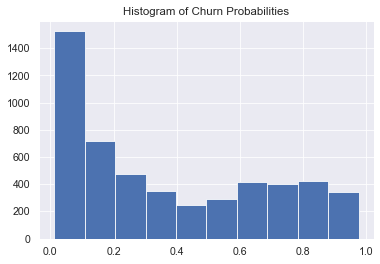

886


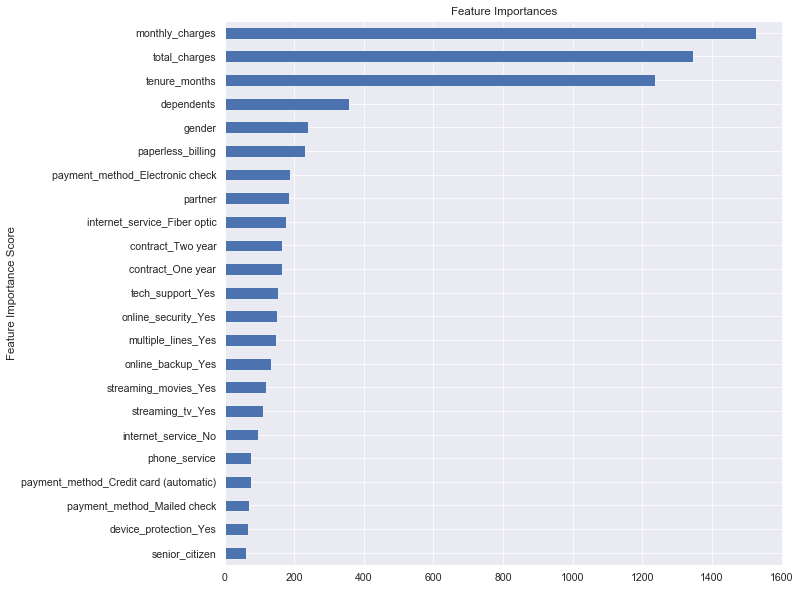

In [51]:
y_pred_prob = bestmodel.predict_proba(x_false)
#display(pd.DataFrame(y_pred_prob))
plt.title('Histogram of Churn Probabilities')
plt.hist(pd.DataFrame(y_pred_prob)[1])
plt.show()

# Split the result by the probability cut of churning
probCut = 0.75

highprobchurn = pd.DataFrame(y_pred_prob, columns = ['no', 'yes'])

highprobchurn['churn_label'] = highprobchurn['yes'] > probCut
print(len(highprobchurn[highprobchurn['churn_label']==1]))

 
# pie chart plot for target variable 
churn = highprobchurn['churn_label'].value_counts().to_frame()
churn = churn.reset_index()
churn = churn.rename(columns = {'index': 'Category'})
fig = px.pie(churn, 
             values='churn_label',
             names='Category',
             title = 'Current customers with a churning probability of more then {:.0f}%'.format(probCut*100),

             width = 600,
             height = 600
             )
# align title
fig.update_layout(title_x=0.5)
#fig.update(layout_title_text='Model: ' + bestModel)
fig.show()
feat_imp = pd.Series(bestmodel.get_booster().get_fscore()).sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(10, 10))
feat_imp.plot(kind='barh', title='Feature Importances', ax=ax)
plt.ylabel('Feature Importance Score')
#plt.xticks(rotation = 45)
plt.show()
